# Project 2 - Classification of Fifa 22 Football Players

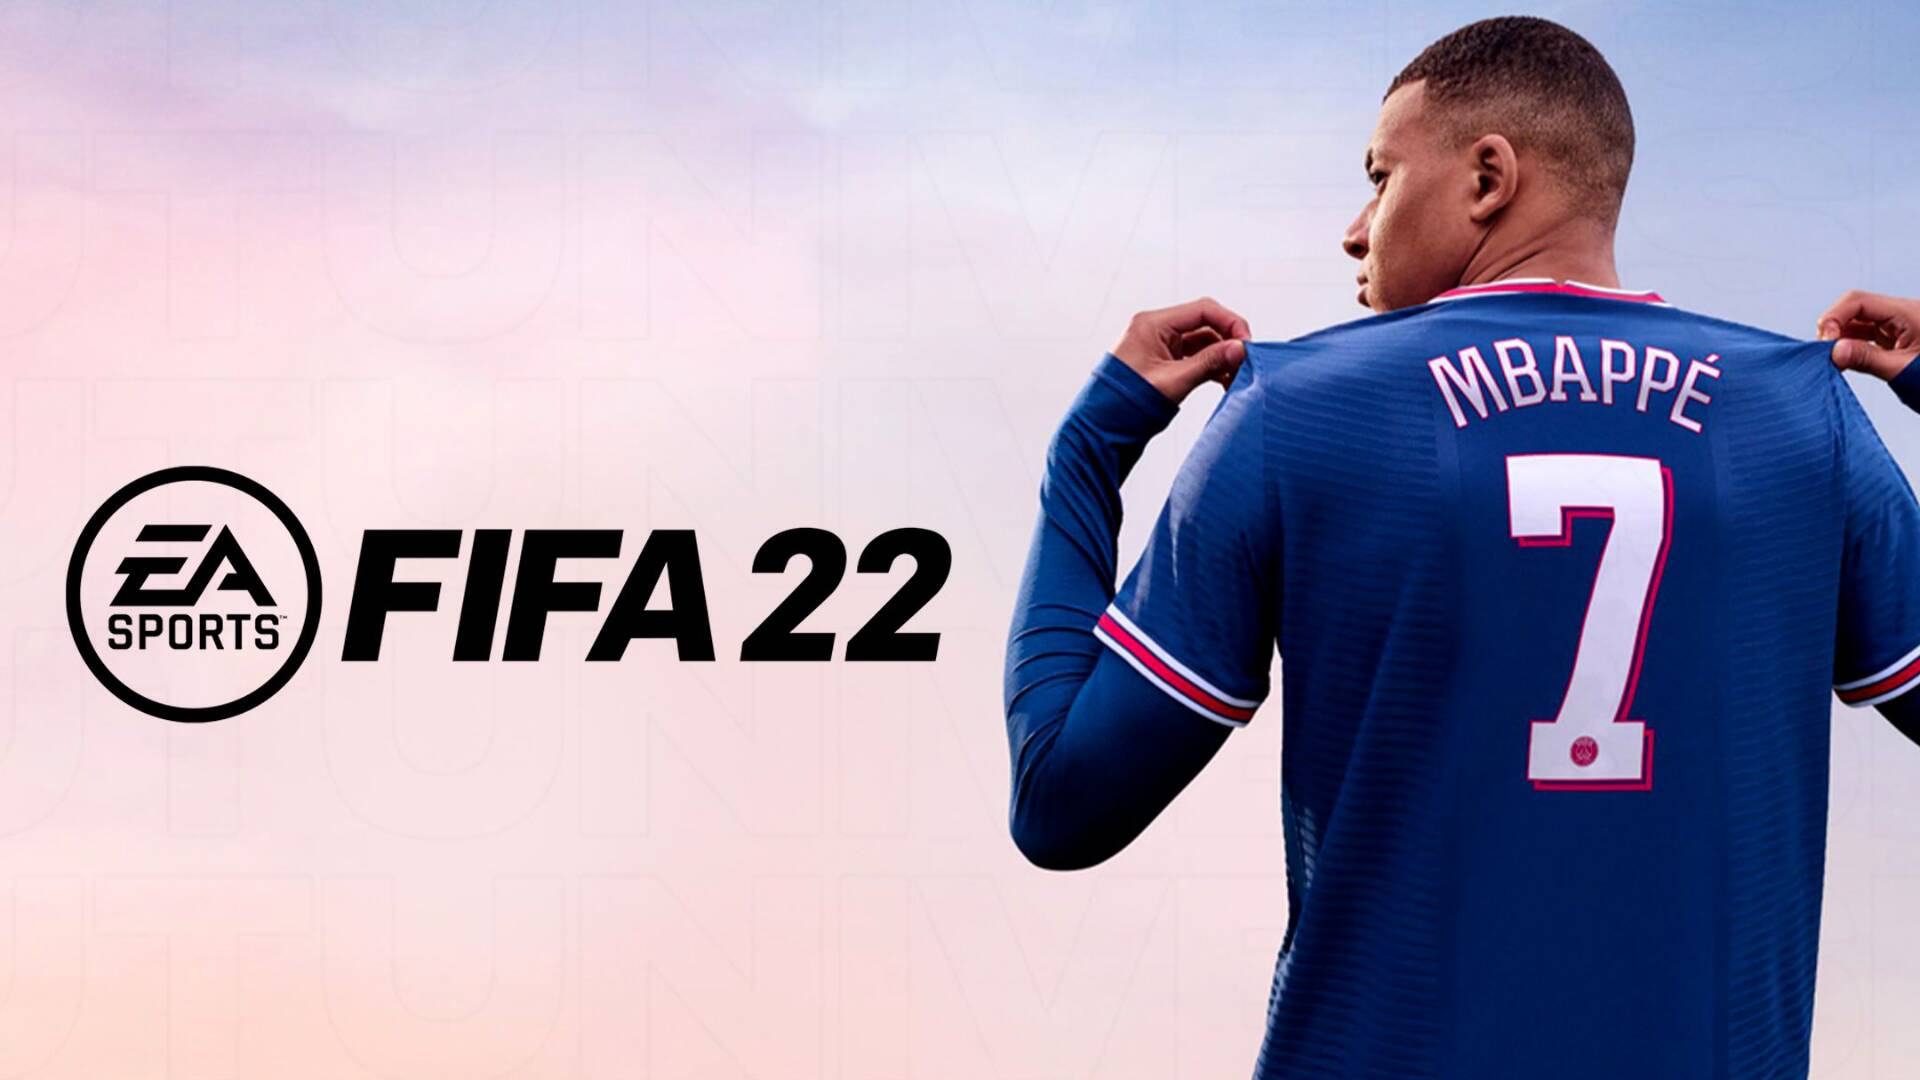

## I. Dataset

### Description

For the Classification task of the project, we have chosen the "FIFA 22 Complete Player" dataset. This dataset contains attributes ratings (height, weight, speed, accelaration, jumping, etc.) of all professional football players in Fifa 22. The target variable that we use is Player Role with 4 categories (Defender, Midfileder, Attacker, Goalkeeper).

A quick overview of column definitions:

Overview:
- id - Unique ID for each player
- Name - Name of Player
- FullName - Fullname of Player
- ...

Physical Attributes:

- Height: Player's height.
- Weight: Player's weight.
- Overall: Player's overall rating - how good the player is compared to the rest. (scaled 0-100)
- PreferredFoot: Player is left or right footed? (left / right)
- WeakFoot: Rating of how good the player can use their non-preferred foot. (scaled 1 - 5)
- Acceleration
- SprintSpeed
- Agility 
- Reactions
- Balance
- ShotPower
- Jumping 
- Stamina
- Strength
- Aggression

Technical Attributes:
- SkillMoves: Rating of how good the player is at performing skill moves. (scaled 1 - 5)
- AttackingWorkRate: How active/involved is the player during attacking plays.
- DefensiveWorkRate: How active/involved is the player during defensive scenarios.
- Crossing: How well can the player cross the ball.
- Finishing: How well can the player finish.
- HeadingAccuracy: How well can the player head the ball.
- ShortPassing: How well can the player perform short passes.
- Volleys: How well can the player perform volley shot (first shot in air).
- Dribbling: How well can the player dribble (control the ball while moving).
- Curve: How well can the player curve the ball.
- FKAccuracy: How well can the player score from free kick.
- LongPassing:  How well can the player perform long passes.
- BallControl: How well can the player contol the ball (control the ball while stationary).
- LongShots: How well can the player perform long shots.
- Interceptions: How well can the player perform interception (take ball from oppnent).
- Positioning: How well can the player position him/herself on the court during play.
- Vision: How well can the player spot potential plays and other students.
- Penalties: How well can the player spot potential plays and other players.
- Composure: How well can the player stay calm in stressful situations.
- Marking: How well can the player follow closely to an opponent during defensive plays.
- StandingTackle: How well can the player tackle while standing.
- SlidingTackle:  How well can the player tackle sith sliding.
- GKDiving: GK stands for goalkeeper (all players are able to goal keep) - how well can the player perform diving saves.
- GKHandling: How well can the player handle the ball with hands.
- GKKicking: How well can the player kick the ball.
- GKPositioning: How well can the player position in the goal post.
- GKReflexes: How quick can the player react.



### Dataset

https://www.kaggle.com/cashncarry/fifa-22-complete-player-dataset

### Shapes: 
Our dataset contains 19260  rows and 90 columns. Three of those columns are categorical ( ). The rest are continuous.
The dataset is large but worry not, we will reduce it to only 5000 observations and focus only on Physical and Technical attributes.

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
pd.options.display.max_rows = 100

df1 = pd.read_csv("players_fifa22.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

### Missing Values:
We see that there are 5 columns with large number of missing values. We consider these variables insignificant for the classification and choose to drop them. Percentage of missing values in dataset: 2.1480 %

In order to satisfy the 5% missing values condition, we will randomly assign NA to the dataframe for up to 5% of cells.



In [2]:
# Number of Missing Values
print(df1.isnull().sum())

ID                       0
Name                     0
FullName                 0
Age                      0
Height                   0
Weight                   0
PhotoUrl                 0
Nationality              0
Overall                  0
Potential                0
Growth                   0
TotalStats               0
BaseStats                0
Positions                0
BestPosition             0
Club                     0
ValueEUR                 0
WageEUR                  0
ReleaseClause            0
ClubPosition            76
ContractUntil           76
ClubNumber              76
ClubJoined               0
OnLoad                   0
NationalTeam             0
NationalPosition     18503
NationalNumber       18503
PreferredFoot            0
IntReputation            0
WeakFoot                 0
SkillMoves               0
AttackingWorkRate        0
DefensiveWorkRate        0
PaceTotal                0
ShootingTotal            0
PassingTotal             0
DribblingTotal           0
D

In [3]:
print("Percentage of missing values in dataset: {:.4f}".format(df1.isna().values.sum()/((len(df1)*len(df1.columns)))*100), "%")

Percentage of missing values in dataset: 2.1480 %


In [4]:
# Add Missing Values for another 3%
for col in df1.columns:
    df1.loc[df1.sample(frac=0.03).index, col] = np.nan

In [5]:
print("Percentage of missing values in dataset after randomly assign NA: {:.4f}".format(df1.isna().values.sum()/((len(df1)*len(df1.columns)))*100), "%")

Percentage of missing values in dataset after randomly assign NA: 5.0848 %


## II. Data Exploratory & Manipulaltion

We see that there are too many values for the target variable. Notice many positions are varaiants of either of the 4 main role in football that are Defender, Midfielder, Attackers, and Goalkeeper. Thus, we can reduce the complecity here by grouping these positions by Defender, Midfielder, Attackers, and Goalkeeper.

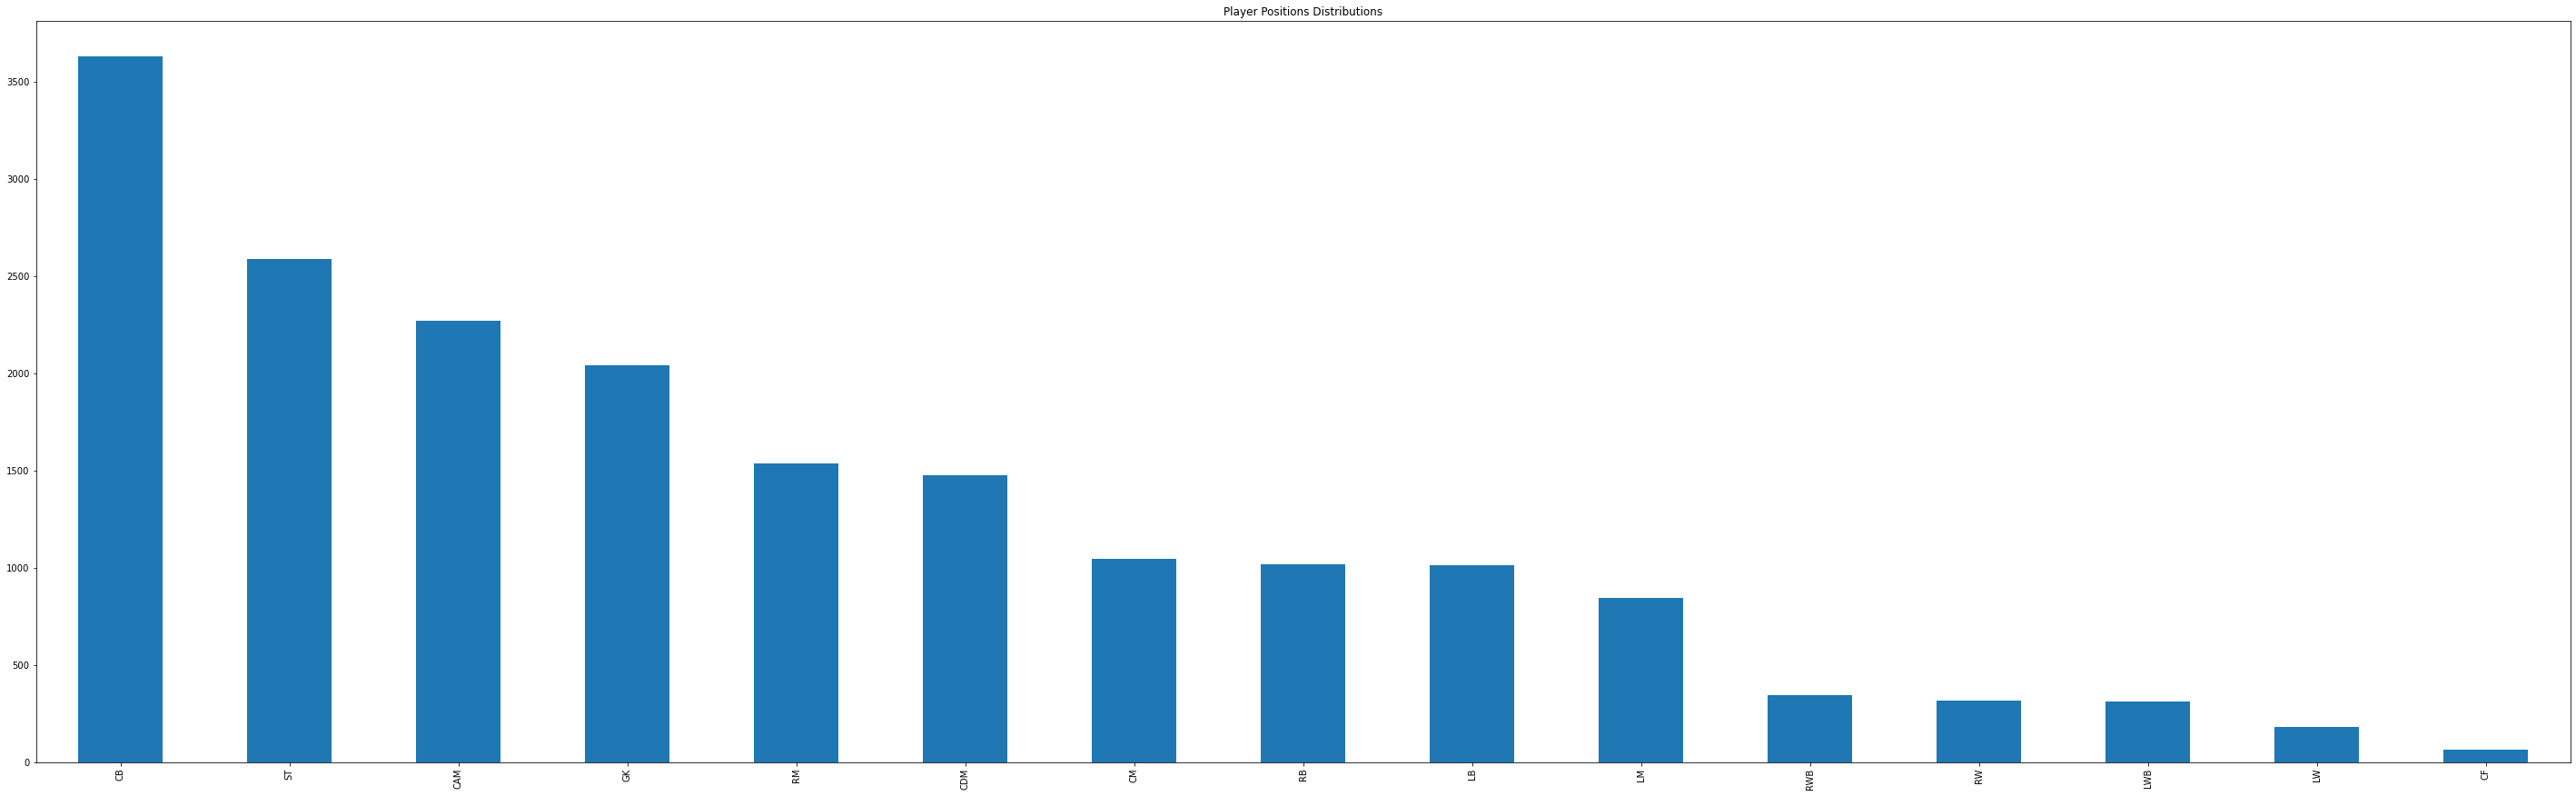

In [6]:
# Visualize our target variables
df1['BestPosition'].value_counts().plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Player Positions Distributions');

In [7]:
# Group Positions into 4 categories Defender, Midfielder, Attackers, and Goalkeeper. 

attack_pos = ['ST', 'RW', 'LW', 'CF']
midfield_pos = ['CAM', 'LM', 'LM', 'CM', 'RM', 'CDM']
defend_pos = ['LWB', 'LB', 'CB', 'RB', 'RWB']
all_pos = df1['BestPosition']

df1.loc[(df1['BestPosition'].isin(attack_pos)), 'group_pos'] = 'attacker'  
df1.loc[(df1['BestPosition'].isin(midfield_pos)), 'group_pos'] = 'midfielder'  
df1.loc[(df1['BestPosition'].isin(defend_pos)), 'group_pos'] = 'defender'  
df1.loc[(df1['BestPosition'] == 'GK'), 'group_pos'] = 'goalkeeper'  
       

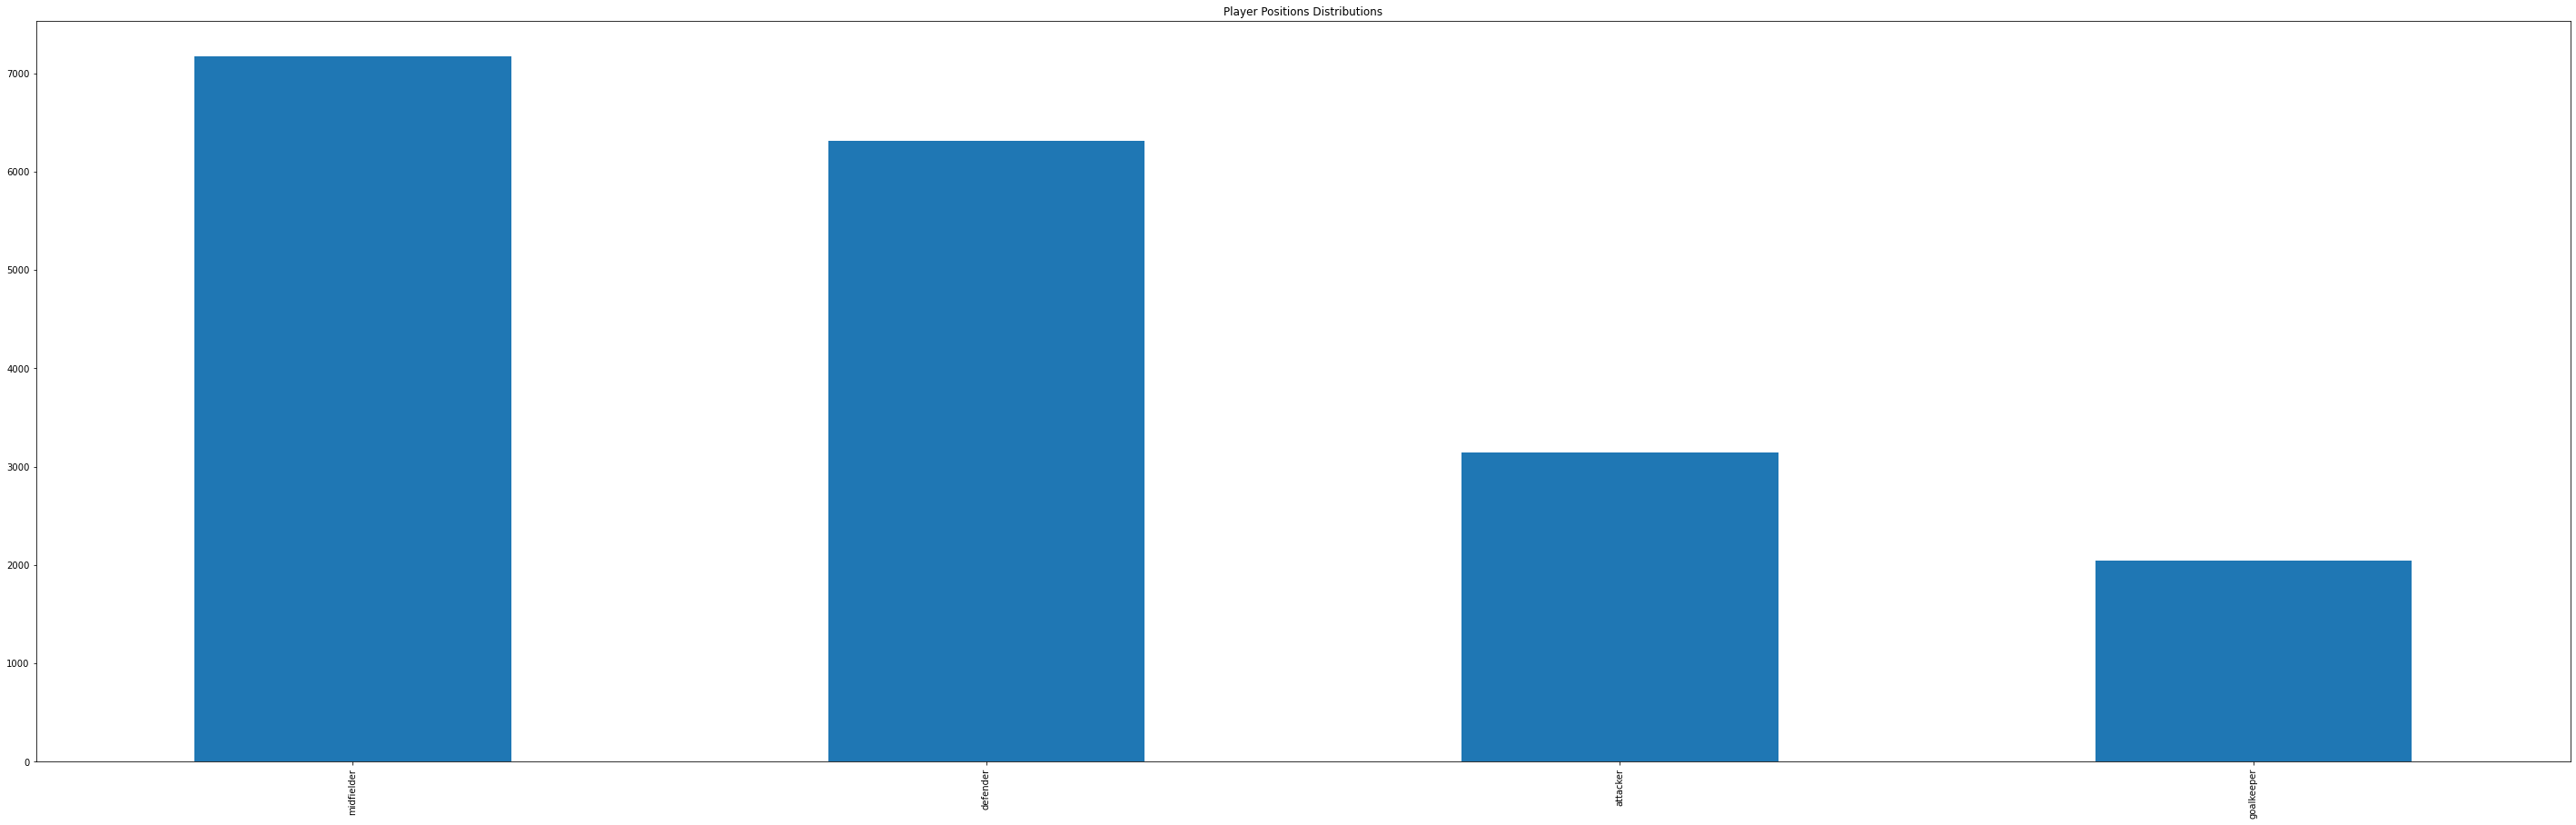

In [8]:
# Distribution of Positions after grouping into 4 categories Defender, Midfielder, Attackers, and Goalkeeper. 

df1['group_pos'].value_counts().plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Player Positions Distributions');

We will only keep Physical (Heigh, Weight, Speed etc.) and Technical (Passing, Longshot, Finsishing, etc.) attributes for each player and drop the rest. This is to help us achieve the goal of classifying players' position based purely on their Physical and Technical attributes.

In [9]:
# Identify the Physical and Technical attributes. We will only work on these from now on

attributes = ['group_pos', 'Height', 'Weight', 'Overall', 'PreferredFoot', 'WeakFoot', 'SkillMoves', 
              'AttackingWorkRate', 'DefensiveWorkRate', 'Crossing', 'Finishing', 'HeadingAccuracy', 
              'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
              'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
              'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties','Composure', 'Marking',
              'StandingTackle','SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'] 

relevant_data = df1[attributes]
relevant_data

,group_pos,Height,Weight,Overall,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,attacker,170.0,72.0,93.0,Left,4.0,4.0,Medium,Low,85.0,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,attacker,185.0,81.0,92.0,Right,4.0,4.0,High,Medium,71.0,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,attacker,187.0,83.0,91.0,Right,4.0,5.0,High,Low,87.0,...,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,attacker,182.0,73.0,91.0,Right,4.0,5.0,High,Low,78.0,...,79.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
4,goalkeeper,188.0,87.0,91.0,Right,3.0,1.0,Medium,Medium,13.0,...,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,defender,180.0,75.0,48.0,Right,3.0,2.0,NaN,Medium,28.0,...,37.0,44.0,50.0,49.0,47.0,5.0,6.0,7.0,13.0,10.0
19256,goalkeeper,196.0,85.0,48.0,Right,2.0,1.0,Medium,Medium,12.0,...,8.0,13.0,20.0,16.0,18.0,49.0,47.0,45.0,44.0,46.0
19257,defender,183.0,77.0,48.0,Right,3.0,2.0,Medium,Medium,NaN,...,NaN,45.0,52.0,53.0,51.0,14.0,12.0,10.0,7.0,NaN
19258,defender,174.0,69.0,48.0,Right,3.0,2.0,Medium,Medium,26.0,...,38.0,42.0,52.0,51.0,52.0,10.0,13.0,7.0,7.0,15.0


In [10]:
# Look at only the top 5000 players (Overall) on the extracted data above
number_player = 5000
data = relevant_data.nlargest(number_player, 'Overall')
data = data.reset_index(drop=True)
data

,group_pos,Height,Weight,Overall,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,attacker,170.0,72.0,93.0,Left,4.0,4.0,Medium,Low,85.0,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,attacker,185.0,81.0,92.0,Right,4.0,4.0,High,Medium,71.0,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,attacker,187.0,83.0,91.0,Right,4.0,5.0,High,Low,87.0,...,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,attacker,182.0,73.0,91.0,Right,4.0,5.0,High,Low,78.0,...,79.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
4,goalkeeper,188.0,87.0,91.0,Right,3.0,1.0,Medium,Medium,13.0,...,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,attacker,185.0,82.0,70.0,Right,3.0,3.0,High,High,51.0,...,72.0,67.0,33.0,25.0,20.0,9.0,8.0,8.0,10.0,12.0
4996,attacker,172.0,66.0,70.0,Right,4.0,3.0,Medium,Medium,66.0,...,NaN,70.0,17.0,26.0,26.0,8.0,7.0,15.0,7.0,9.0
4997,midfielder,178.0,72.0,70.0,Left,2.0,3.0,High,Medium,65.0,...,42.0,63.0,67.0,69.0,71.0,6.0,13.0,10.0,8.0,8.0
4998,defender,178.0,75.0,70.0,Right,3.0,2.0,Medium,Medium,73.0,...,49.0,67.0,66.0,65.0,66.0,9.0,11.0,14.0,8.0,16.0


In [11]:
# Impute Missing Values based on data type

# Take Quicklook at the current data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_pos          4861 non-null   object 
 1   Height             4850 non-null   float64
 2   Weight             4860 non-null   float64
 3   Overall            5000 non-null   float64
 4   PreferredFoot      4843 non-null   object 
 5   WeakFoot           4859 non-null   float64
 6   SkillMoves         4845 non-null   float64
 7   AttackingWorkRate  4837 non-null   object 
 8   DefensiveWorkRate  4855 non-null   object 
 9   Crossing           4847 non-null   float64
 10  Finishing          4867 non-null   float64
 11  HeadingAccuracy    4842 non-null   float64
 12  ShortPassing       4855 non-null   float64
 13  Volleys            4871 non-null   float64
 14  Dribbling          4847 non-null   float64
 15  Curve              4878 non-null   float64
 16  FKAccuracy         4822 

We see that most columns are nuerical data (continuos). For these, we will impute missing data with mean. For the 3 categorical columns, we will impute missing values with mode and transform into dummy variables. 

#### Numerical Columns

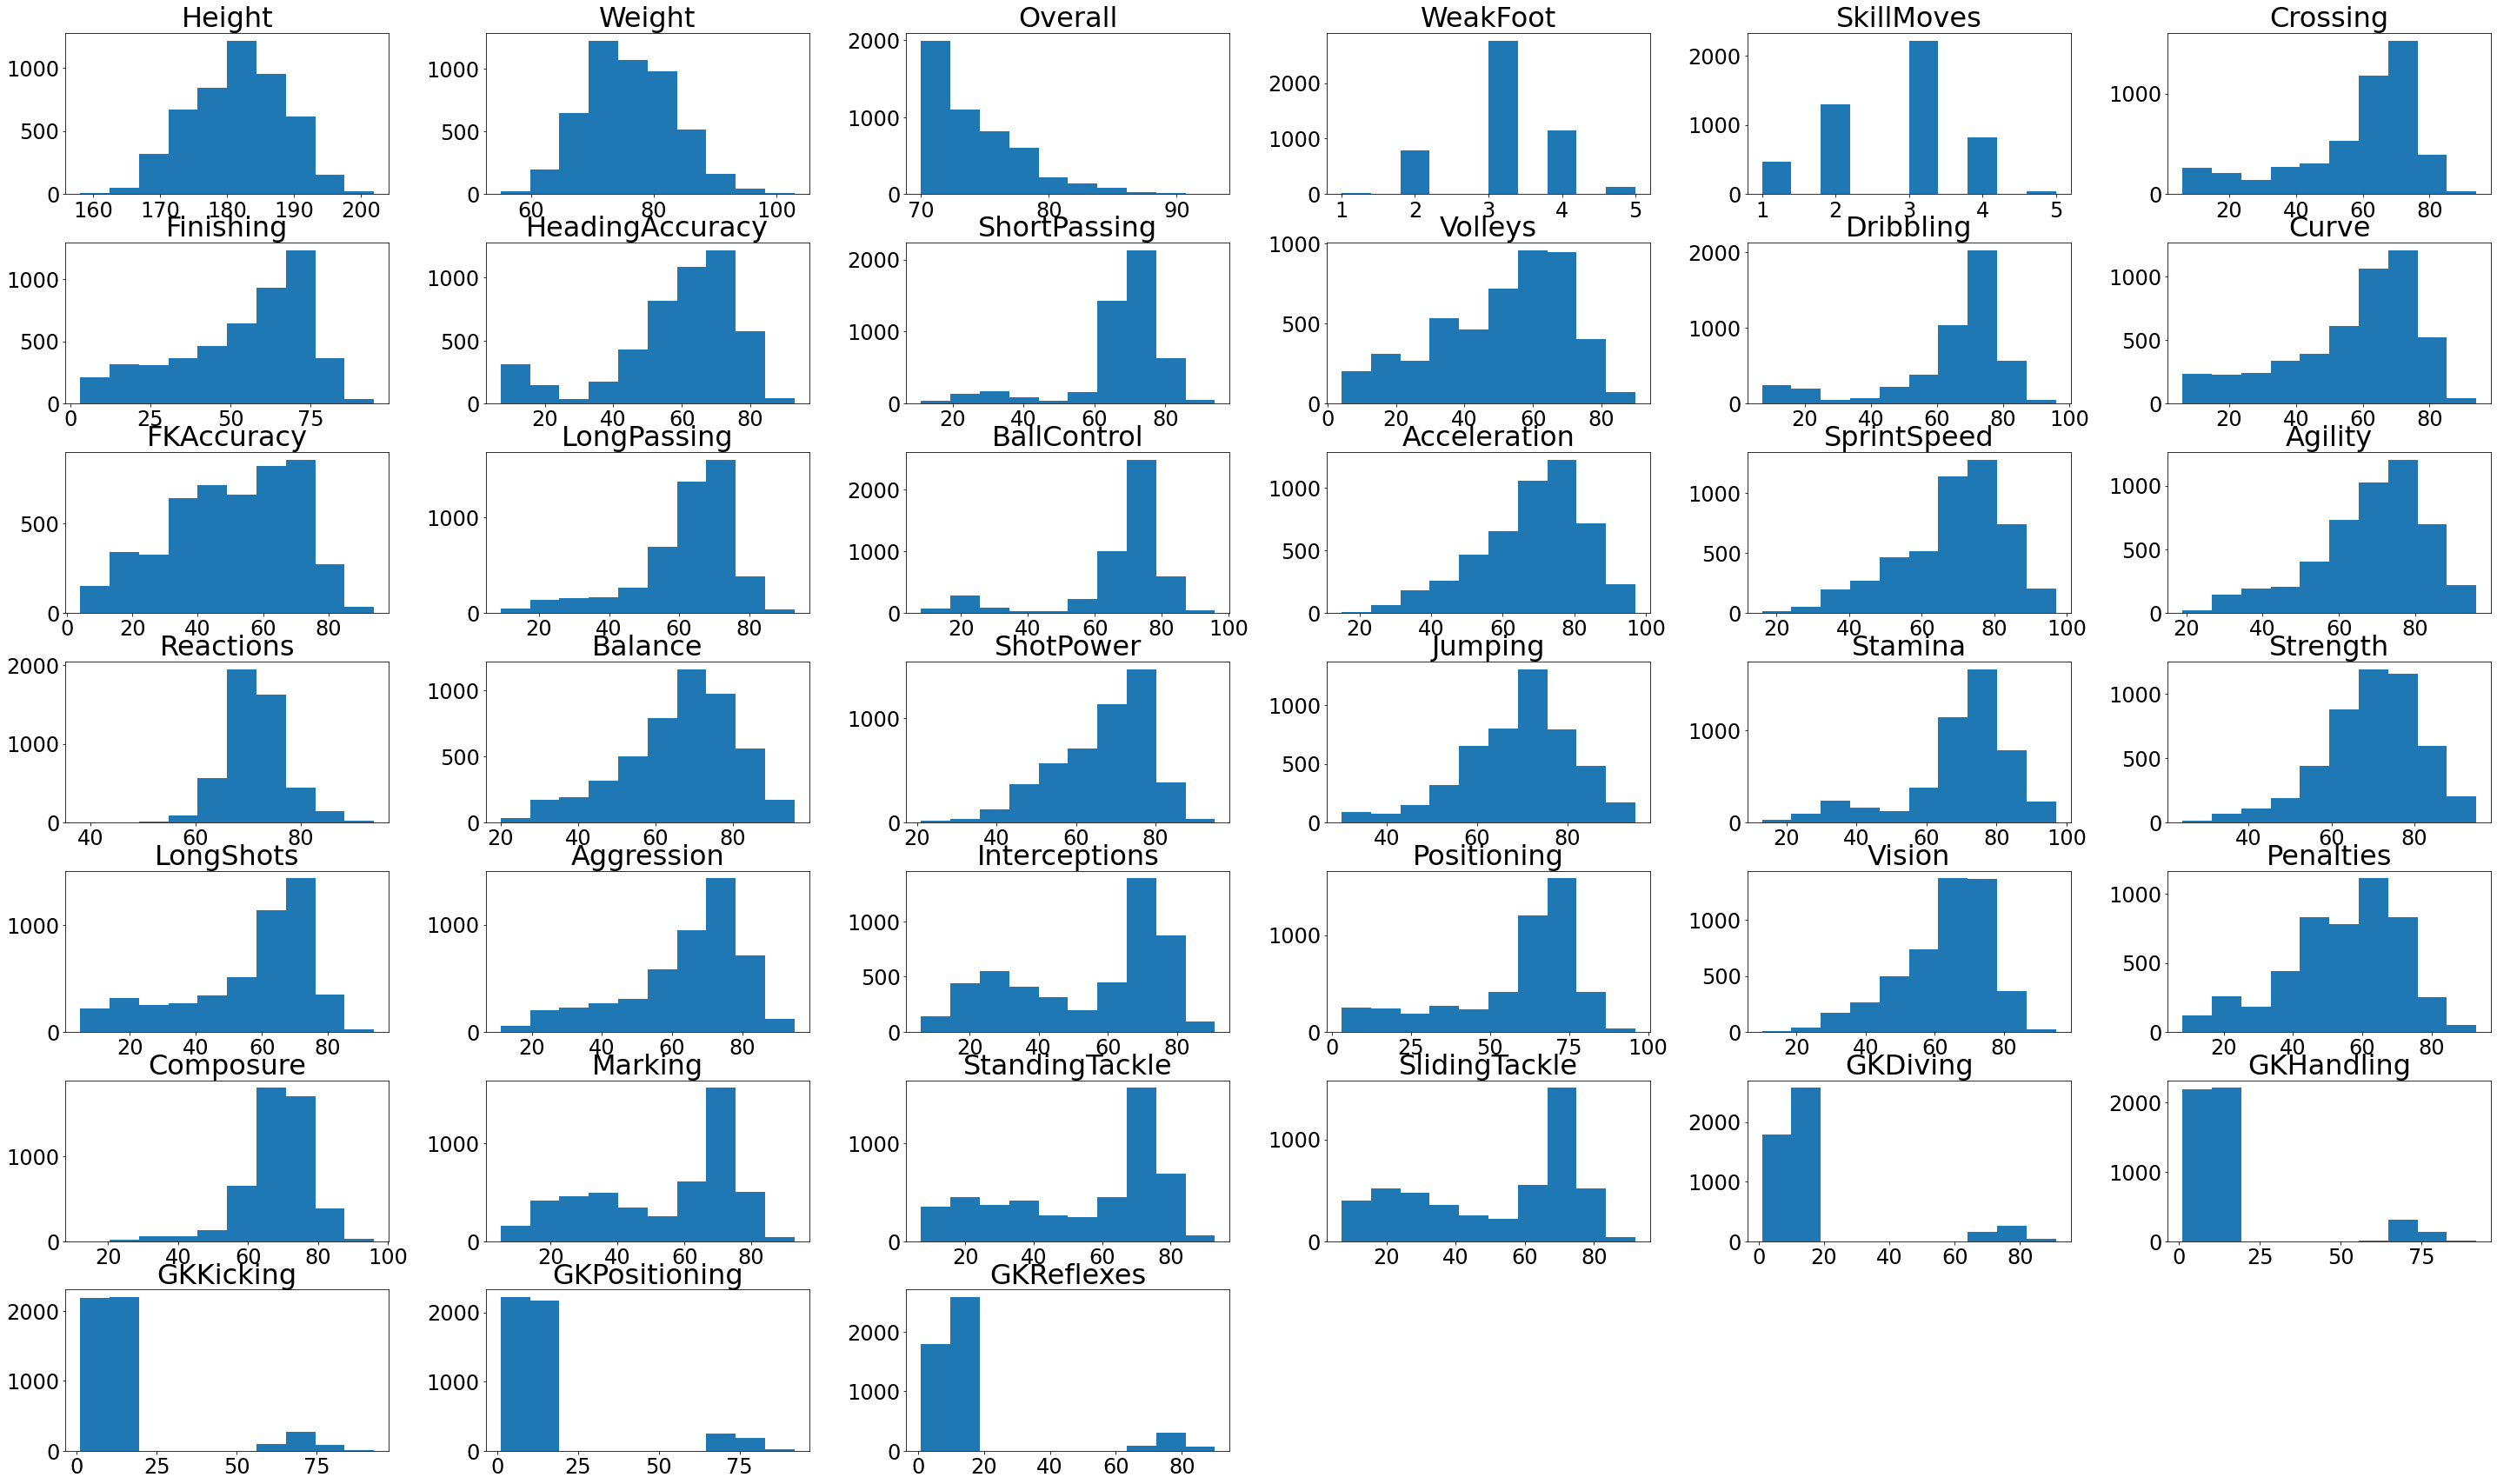

In [12]:
import matplotlib

params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
data.hist(figsize=(50, 30), grid = False, bins = 10);

Here we are checking for the distribution of each column to decide whether to use mean or median to fillna(). We see that fpr the numerical columns, we can only use mean() for Height and Weight as they have normal distribution. For the rest, we will use median().

In [13]:
# Height and Weight impute missing value with Mean()
data['Height'].fillna(data['Height'].mean(), inplace = True)
data['Weight'].fillna(data['Weight'].mean(), inplace = True)


In [14]:
# For the rest of the columns, impute missing value with Median()
cols = ['Overall', 'WeakFoot', 'SkillMoves', 
        'Crossing', 'Finishing', 'HeadingAccuracy', 
        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
        'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties','Composure', 'Marking',
        'StandingTackle','SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

data[cols] = data[cols].fillna(data[cols].median().iloc[0])

In [15]:
print("Percentage of missing values in dataset: {:.4f}".format(data.isna().values.sum()/((len(data)*len(data.columns)))*100), "%")
print(" ")
print("Percentage of missing values by cols: ")
print((data.isnull().sum() * 100 / len(data)))


Percentage of missing values in dataset: 0.2809 %
 
Percentage of missing values by cols: 
group_pos            2.78
Height               0.00
Weight               0.00
Overall              0.00
PreferredFoot        3.14
WeakFoot             0.00
SkillMoves           0.00
AttackingWorkRate    3.26
DefensiveWorkRate    2.90
Crossing             0.00
Finishing            0.00
HeadingAccuracy      0.00
ShortPassing         0.00
Volleys              0.00
Dribbling            0.00
Curve                0.00
FKAccuracy           0.00
LongPassing          0.00
BallControl          0.00
Acceleration         0.00
SprintSpeed          0.00
Agility              0.00
Reactions            0.00
Balance              0.00
ShotPower            0.00
Jumping              0.00
Stamina              0.00
Strength             0.00
LongShots            0.00
Aggression           0.00
Interceptions        0.00
Positioning          0.00
Vision               0.00
Penalties            0.00
Composure            0.00

#### Categorical / Binary / Ordinal Column

<AxesSubplot:title={'center':'Distribution of DefensiveWorkRate'}>

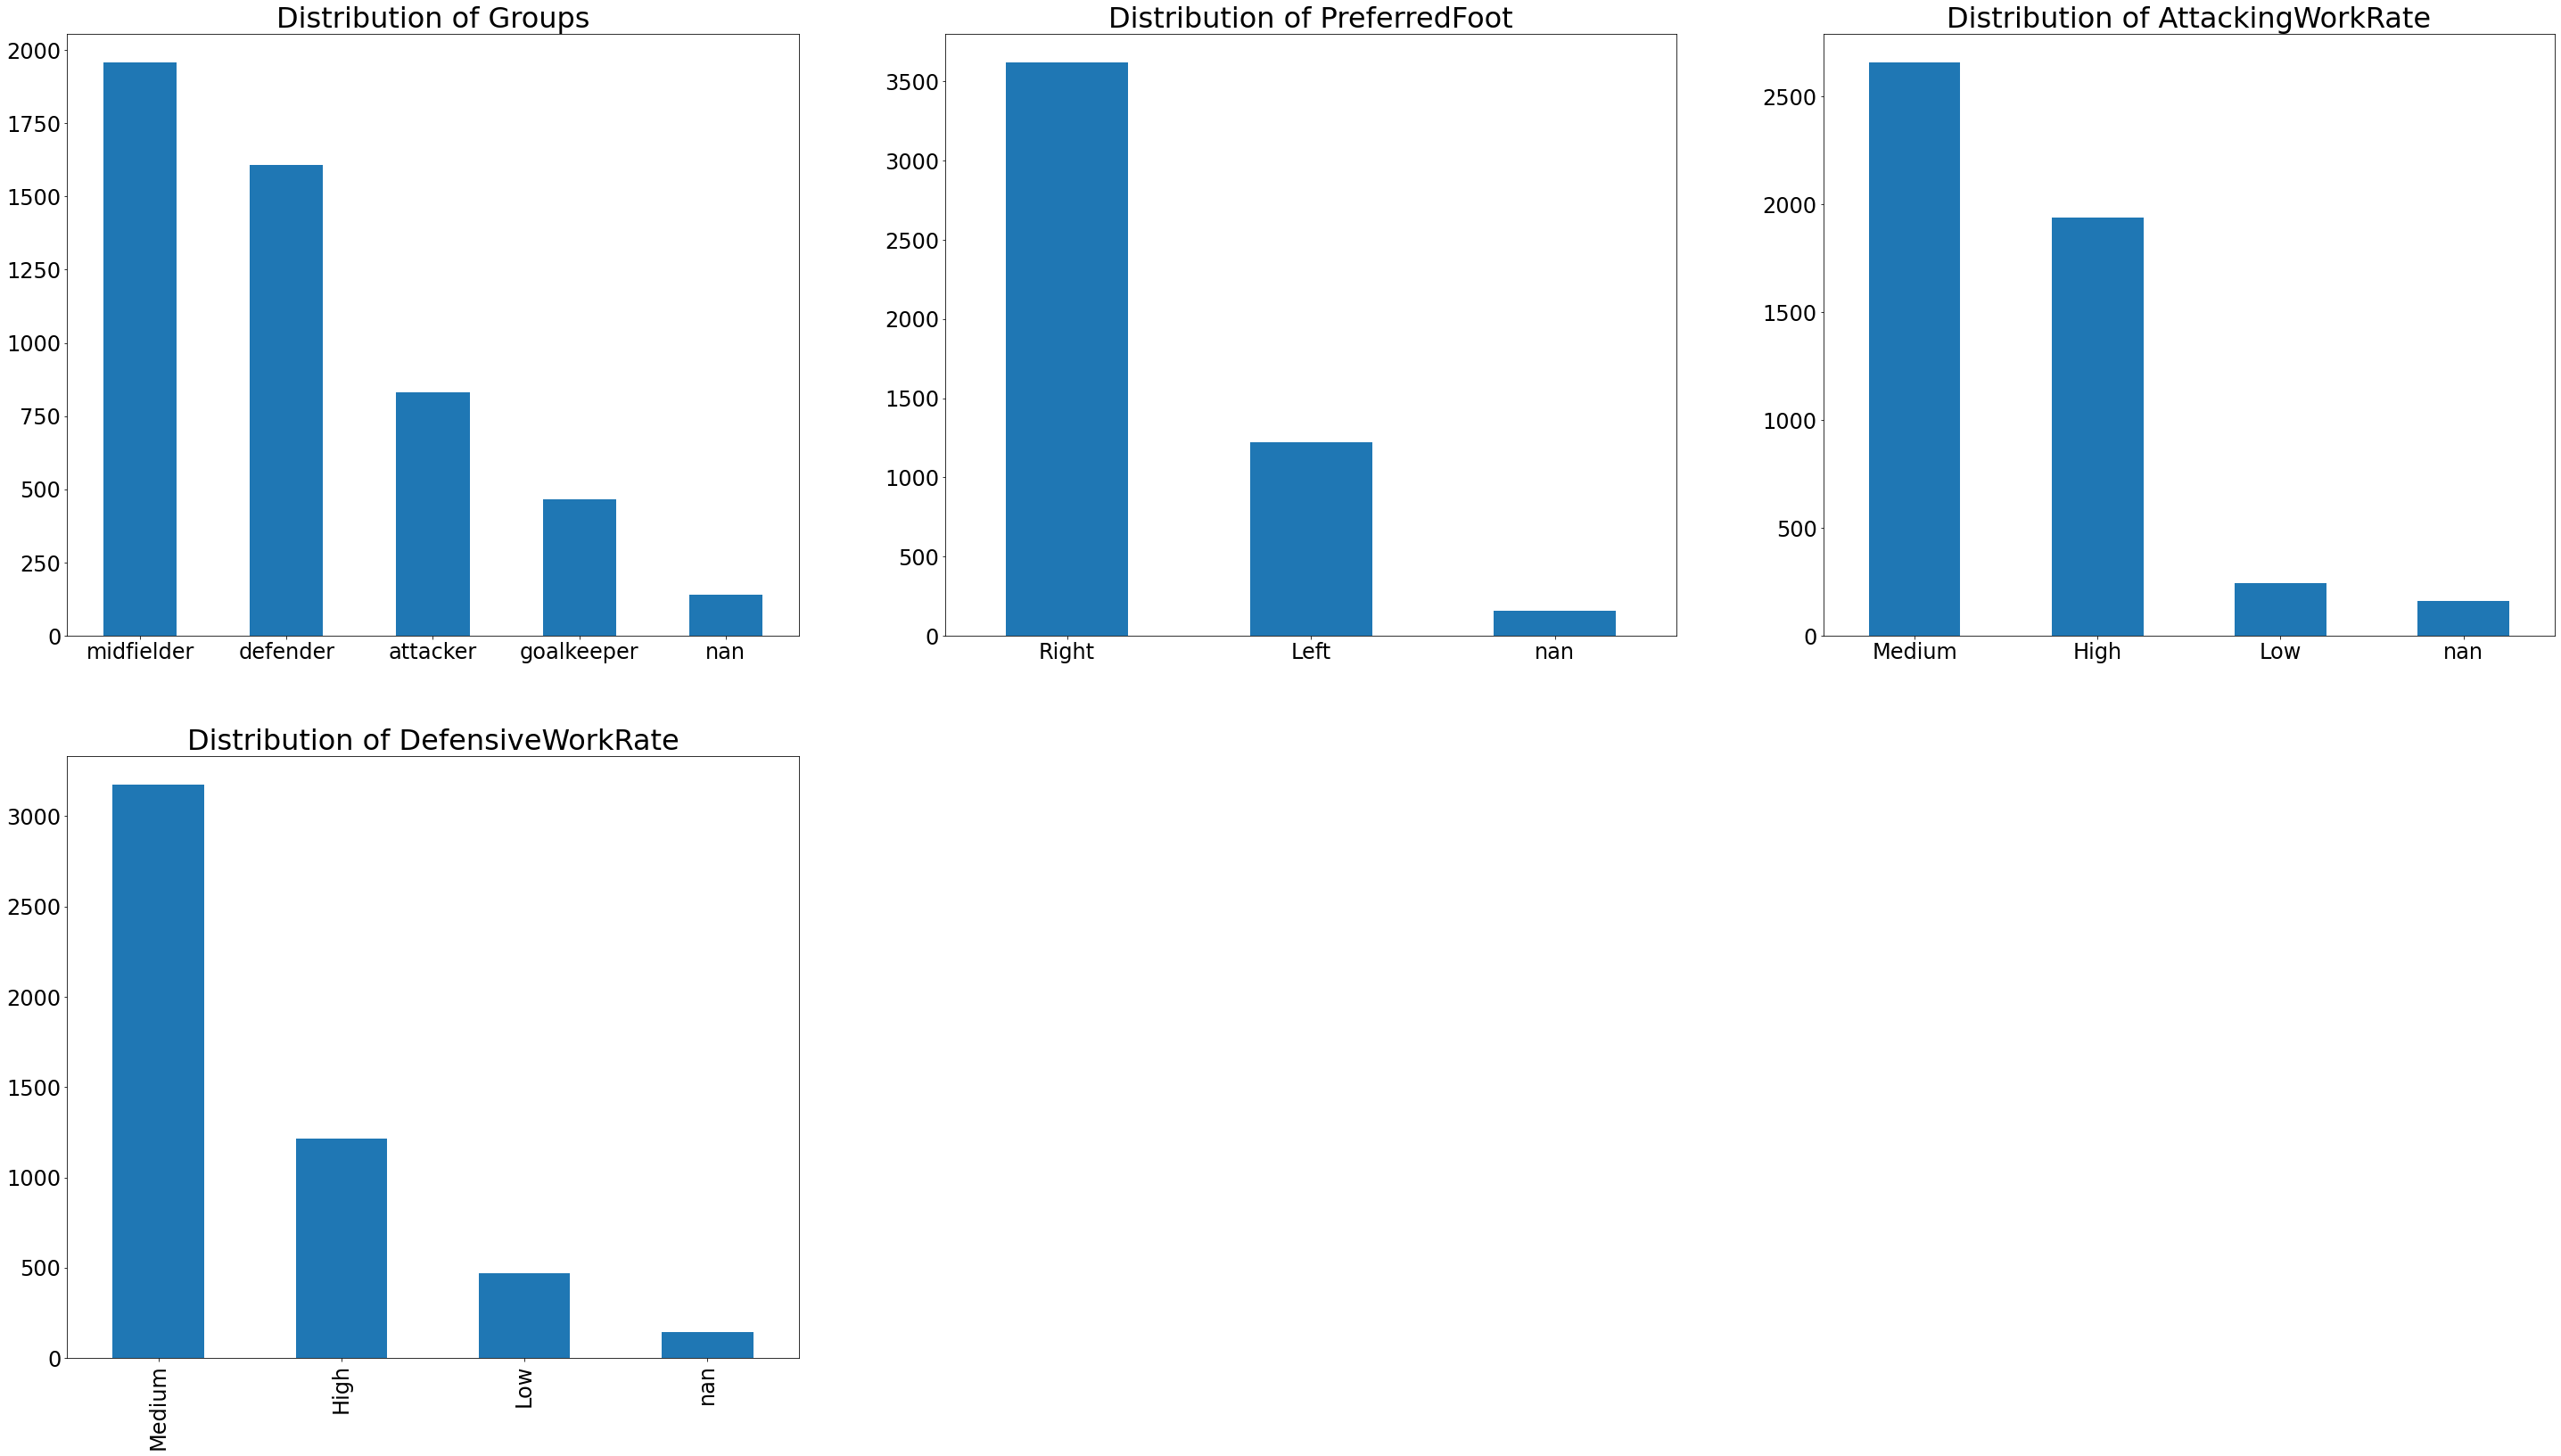

In [16]:
# Plot the distribution of the 3 categorical cols
fizsize_with_subplots = (10, 10)
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (2, 3)

plt.subplot2grid(fig_dims, (0, 0))
data['group_pos'].value_counts(dropna = False).plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Distribution of Groups')
plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (0, 1))
data['PreferredFoot'].value_counts(dropna = False).plot(kind = 'bar',
                                        figsize=(50, 15),
                                        title = 'Distribution of PreferredFoot')
plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (0, 2))
data['AttackingWorkRate'].value_counts(dropna = False).plot(kind = 'bar',
                                            figsize=(50, 15),
                                            title = 'Distribution of AttackingWorkRate')

plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (1, 0))
data['DefensiveWorkRate'].value_counts(dropna = False).plot(kind = 'bar',
                                            figsize=(50, 15),
                                            title = 'Distribution of DefensiveWorkRate')

- For group_pos, there are more 'Midfielder' observations than others. We will create one hot vector of 4 because there're 4 uniques values (Midfielder, Defender, Attacker, Goalkeeper).
- For PreferredFoot, there are more 'Right' observations than 'Left'. We will assign 1 to 'Right' and 0 to 'Left'.
- For AttackingWorkRate, there are more 'Medium' observations than others. We will create one hot vector of 3 because there're 3 uniques values (Medium, High, Low).
- For DefensiveWorkRate, there are more 'Medium' observations than others. We will create one hot vector of 3 because there're 3 uniques values (Medium, High, Low).

In [17]:
# Impute Missing Values & mappings / dummies for the catorical cols.

# GROUP_POS
# Impute Missing Values
data['group_pos'] = data['group_pos'].replace(np.nan, data['group_pos'].mode().iloc[0])

# Get Mappings for target
data['group_pos'] = data['group_pos'].map({'attacker' :0, 'midfielder' :1, 'defender' :2, 'goalkeeper': 3}).astype(int) #mapping numbers

In [18]:
data['group_pos'].value_counts()

1    2096
2    1606
0     832
3     466
Name: group_pos, dtype: int64

In [19]:
# PreferredFoot
# Impute Missing Values
data['PreferredFoot'] = data['PreferredFoot'].replace(np.nan, data['PreferredFoot'].mode().iloc[0])

# Get Mappings as the values are binary
data['PreferredFoot'] = data['PreferredFoot'].map({'Right':1, 'Left':0}).astype(int)

In [20]:
# AttackingWorkRate
# Impute Missing Values
data['AttackingWorkRate'] = data['AttackingWorkRate'].replace(np.nan, data['AttackingWorkRate'].mode().iloc[0])

# Get Mappings as the values are ordinal
data['AttackingWorkRate'] = data['AttackingWorkRate'].map({'Low':0, 'Medium':1, 'High':2}).astype(int)

In [21]:
# DefensiveWorkRate
# Impute Missing Values
data['DefensiveWorkRate'] = data['DefensiveWorkRate'].replace(np.nan, data['DefensiveWorkRate'].mode().iloc[0])

# Get Mappings as the values are ordinal
data['DefensiveWorkRate'] = data['DefensiveWorkRate'].map({'Low':0, 'Medium':1, 'High':2}).astype(int)

In [22]:
# Double Check outcome
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_pos          5000 non-null   int32  
 1   Height             5000 non-null   float64
 2   Weight             5000 non-null   float64
 3   Overall            5000 non-null   float64
 4   PreferredFoot      5000 non-null   int32  
 5   WeakFoot           5000 non-null   float64
 6   SkillMoves         5000 non-null   float64
 7   AttackingWorkRate  5000 non-null   int32  
 8   DefensiveWorkRate  5000 non-null   int32  
 9   Crossing           5000 non-null   float64
 10  Finishing          5000 non-null   float64
 11  HeadingAccuracy    5000 non-null   float64
 12  ShortPassing       5000 non-null   float64
 13  Volleys            5000 non-null   float64
 14  Dribbling          5000 non-null   float64
 15  Curve              5000 non-null   float64
 16  FKAccuracy         5000 

### Split dataset (test/train) & scaling

We split our dataset into 75% train and 25% test. We also scale our dataset since it is imbalanced using MinMaxScaler(). Our data is now ready to be used to build models.

In [23]:
import sklearn as sk
from sklearn.model_selection import train_test_split

X = data.drop('group_pos', axis = 1)
y = data['group_pos']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train = pd.DataFrame(X_train, columns = X.columns) 
X_test = pd.DataFrame(X_test, columns = X.columns)

# Project 2 Starts HERE 

## III. Classification Models


#### Choice of Scoring Function other than Accuracy (F1 score)

Because our dataset is imbalanced, we can not build models just based on accuracy alone. The reason is if we classify everything as the majority class, then we will still get good results even though it's wrong. Therefore, we should also pay attention to precision and recall. Precision is the proportion of positive identifications that was actually correct. Recall is the proportion of actual positives that was identified correctly. These two measures help reduce Type I and II errors.

There is another measure called f1 score that take both precision and recall into account. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

We will use F1 score as a scoring function for our imbalanced dataset.

### Voting Classifier - Hard Voting

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

hclf = VotingClassifier(estimators=[('lr',LogisticRegression(random_state = 0, max_iter = 1000 )), ('dt',DecisionTreeClassifier(random_state = 0)),
                                     ('knn',KNeighborsClassifier())], voting = 'hard')
 
params = [{'lr__C':[0.1, 1, 10],
           'dt__max_leaf_nodes': [5, 10, 25],
           'knn__n_neighbors':[3, 5, 7]}]

hclf_grid = GridSearchCV(hclf, param_grid = params, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True) 
hclf_grid.fit(X_train, y_train)

cvhclf = hclf_grid.best_score_
testhclf = hclf_grid.score(X_test, y_test)

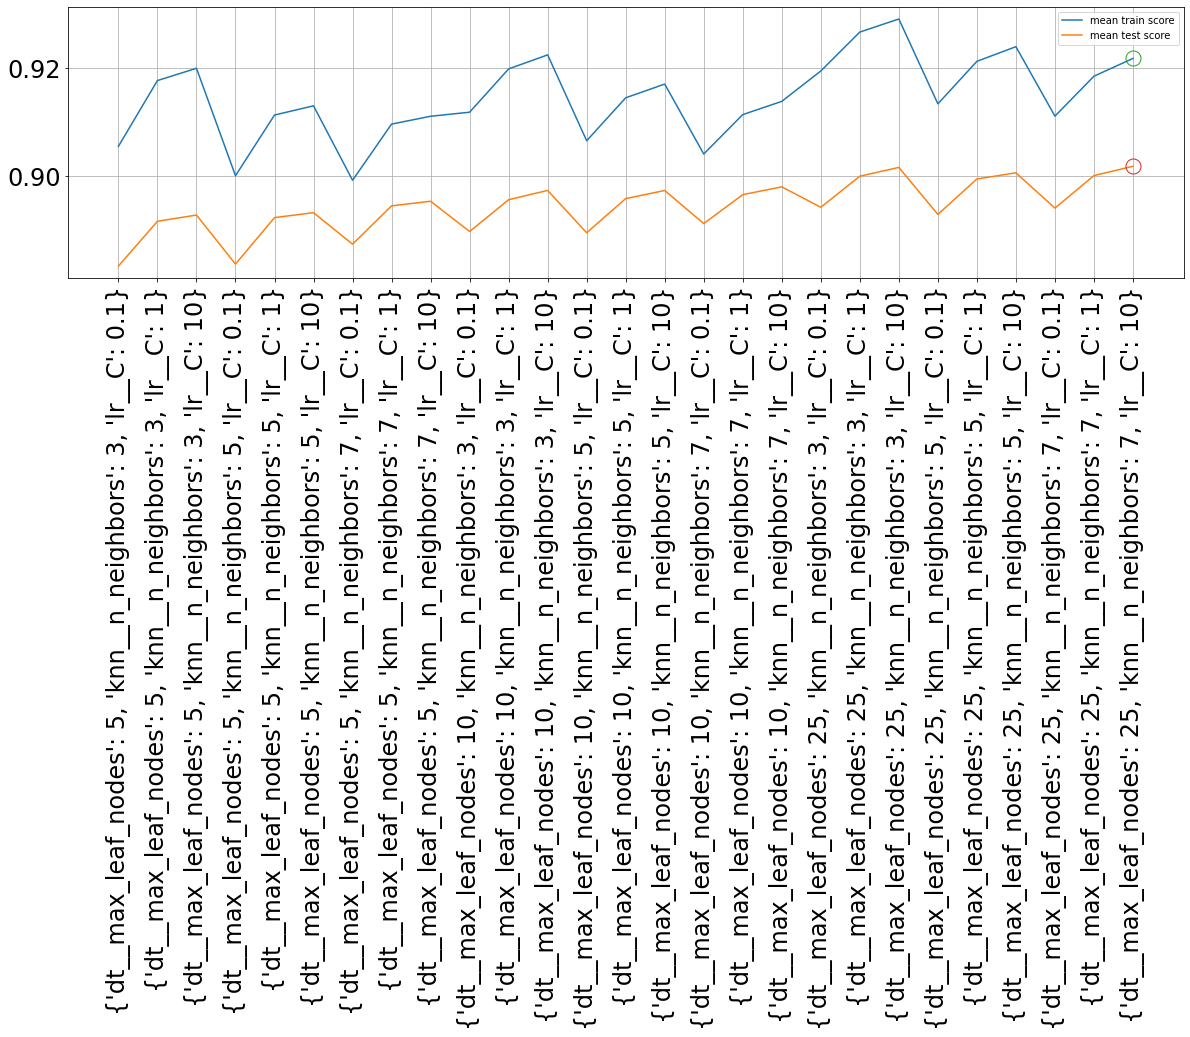

In [26]:
result = pd.DataFrame(hclf_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([hclf_grid.best_index_], result['mean_train_score'][hclf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([hclf_grid.best_index_], result['mean_test_score'][hclf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [27]:
print("Best parameters for Hard Voting: {}".format(hclf_grid.best_params_))
print("Best cross-validation score for Hard Voting: {:.4f}".format(cvhclf))
print("Test score for Hard Voting: {:.4f}".format(testhclf))

Best parameters for Hard Voting: {'dt__max_leaf_nodes': 25, 'knn__n_neighbors': 7, 'lr__C': 10}
Best cross-validation score for Hard Voting: 0.9018
Test score for Hard Voting: 0.8915


### Voting Classifier - Soft Voting

In [28]:
sclf = VotingClassifier(estimators=[('lr',LogisticRegression(random_state = 0,  max_iter = 1000 )), ('dt',DecisionTreeClassifier(random_state = 0)),
                                     ('knn',KNeighborsClassifier())], voting = 'soft')
 
params = [{'lr__C':[0.1, 1, 10],
           'dt__max_leaf_nodes': [5, 10, 25],
           'knn__n_neighbors':[3, 5, 7]}]

sclf_grid = GridSearchCV(sclf, param_grid = params, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True) 
sclf_grid.fit(X_train, y_train)

cvsclf = sclf_grid.best_score_
testsclf = sclf_grid.score(X_test, y_test)

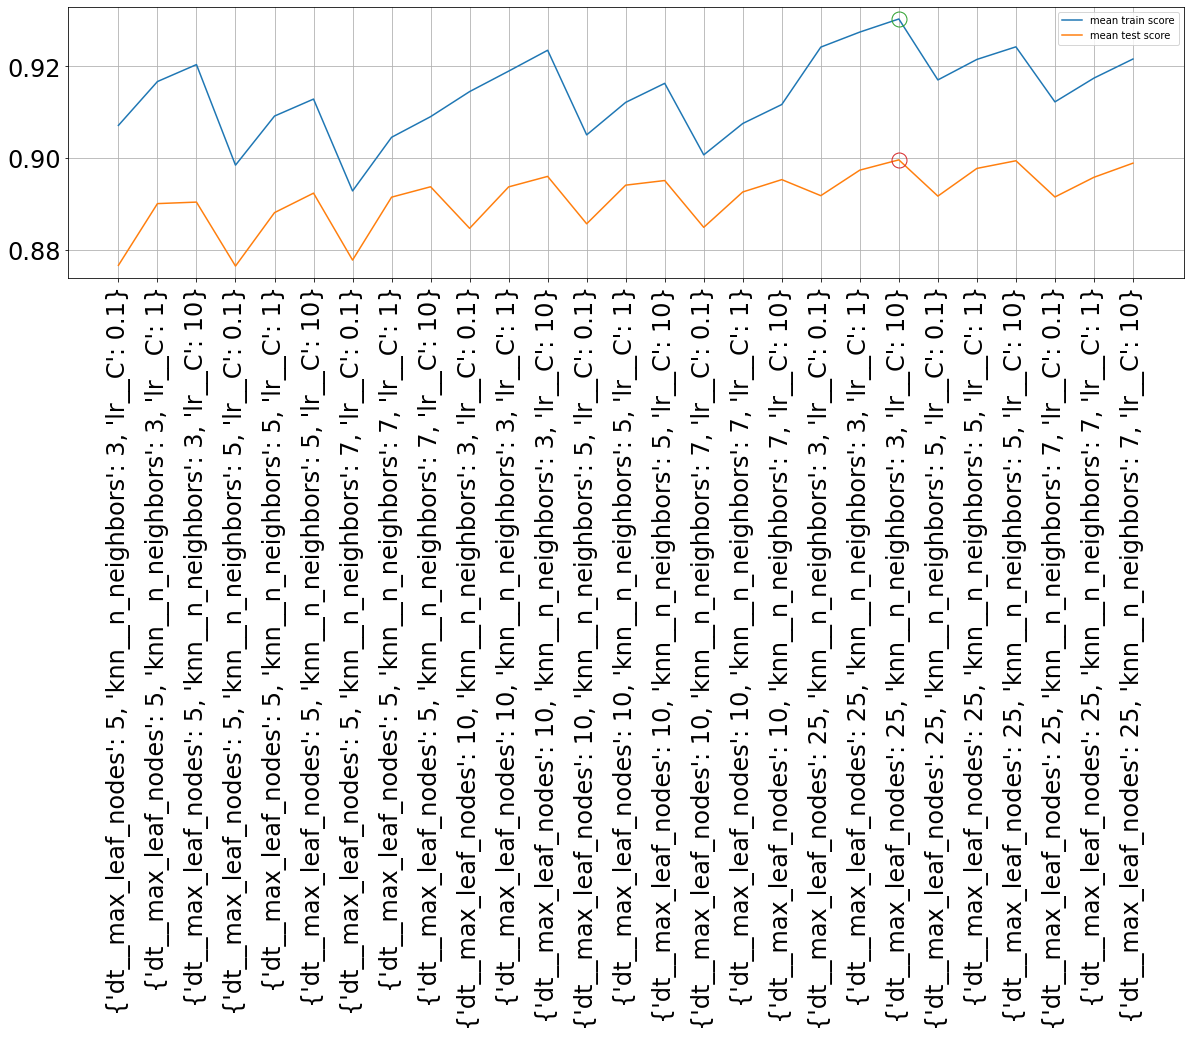

In [29]:
result = pd.DataFrame(sclf_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([sclf_grid.best_index_], result['mean_train_score'][sclf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([sclf_grid.best_index_], result['mean_test_score'][sclf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [30]:
print("Best parameters for Soft Voting: {}".format(sclf_grid.best_params_))
print("Best cross-validation score for Soft Voting: {:.4f}".format(cvsclf))
print("Test score for Soft Voting: {:.4f}".format(testsclf))

Best parameters for Soft Voting: {'dt__max_leaf_nodes': 25, 'knn__n_neighbors': 3, 'lr__C': 10}
Best cross-validation score for Soft Voting: 0.8996
Test score for Soft Voting: 0.8961


###  Bagging: Logistic Regression

In [31]:
from sklearn.ensemble import BaggingClassifier

param_grid = {'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}
              

bag_log = BaggingClassifier(LogisticRegression(C = 10, max_iter = 1000, random_state = 0), bootstrap = True, random_state = 0)
bag_log_grid = GridSearchCV(bag_log, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
bag_log_grid.fit(X_train, y_train)

cvbaglog = bag_log_grid.best_score_
testbaglog = bag_log_grid.score(X_test, y_test)

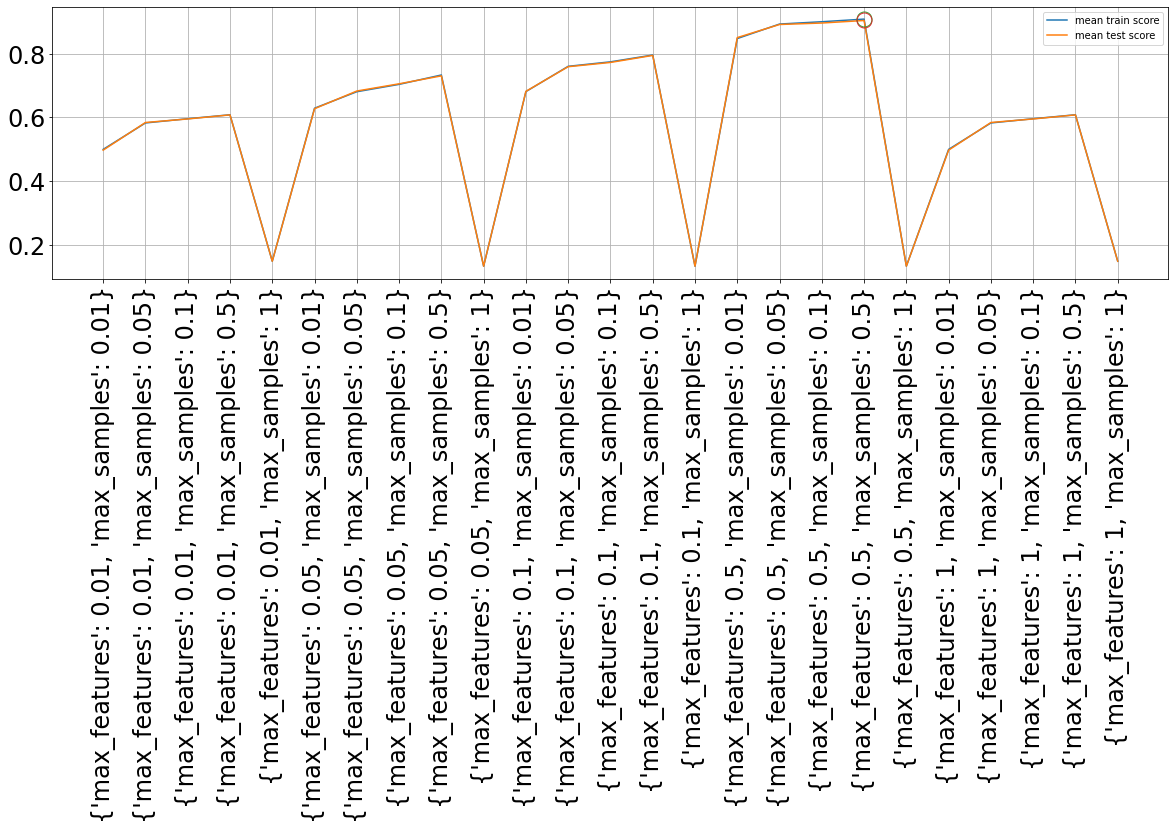

In [32]:
result = pd.DataFrame(bag_log_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([bag_log_grid.best_index_], result['mean_train_score'][bag_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([bag_log_grid.best_index_], result['mean_test_score'][bag_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [33]:
print("Best parameters for Logistic Regression with Bagging: {}".format(bag_log_grid.best_params_))
print("Best cross-validation score for Logistic Regression with Bagging: {:.4f}".format(cvbaglog))
print("Test score for Logistic Regression with Bagging: {:.4f}".format(testbaglog))

Best parameters for Logistic Regression with Bagging: {'max_features': 0.5, 'max_samples': 0.5}
Best cross-validation score for Logistic Regression with Bagging: 0.9043
Test score for Logistic Regression with Bagging: 0.9002


### Bagging: Decision Tree Classifier

In [34]:
param_grid = {'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}
              

bag_dtc = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0), bootstrap = True, random_state = 0)
bag_dtc_grid = GridSearchCV(bag_dtc, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
bag_dtc_grid.fit(X_train, y_train)

cvbagdtc = bag_dtc_grid.best_score_
testbagdtc = bag_dtc_grid.score(X_test, y_test)

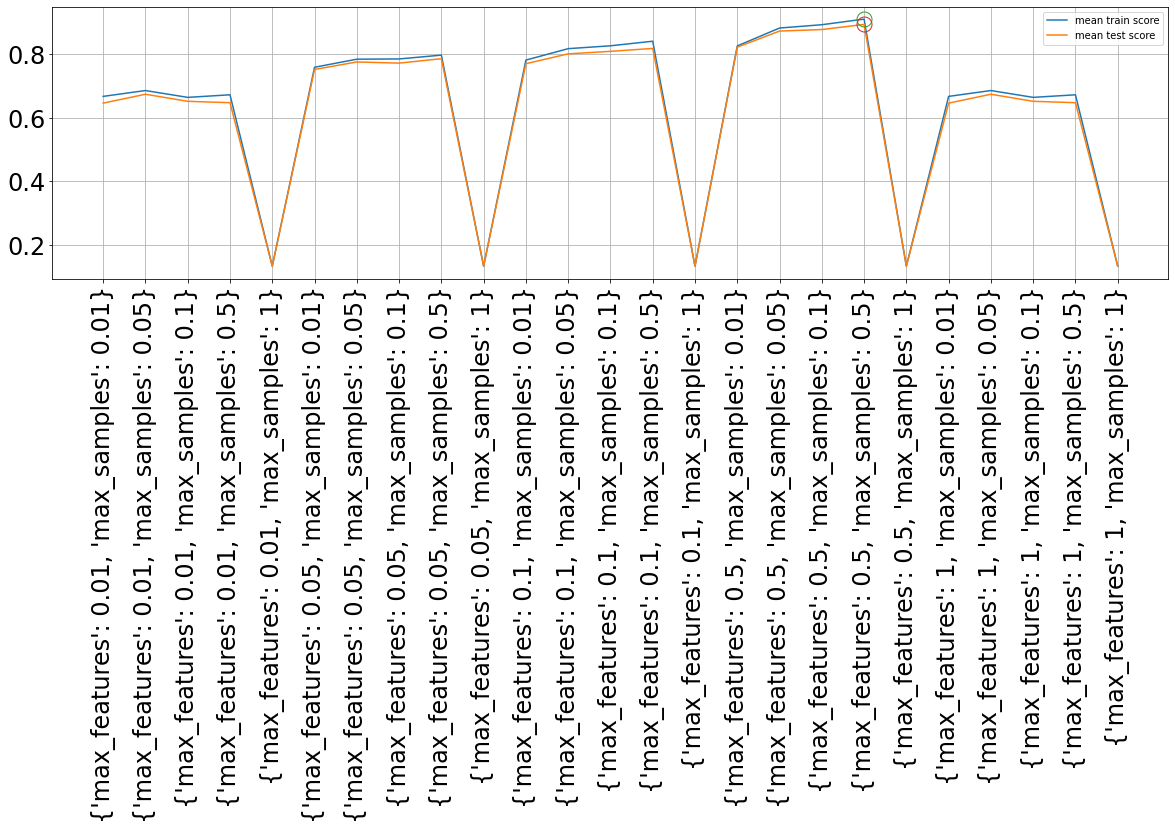

In [35]:
result = pd.DataFrame(bag_dtc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([bag_dtc_grid.best_index_], result['mean_train_score'][bag_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([bag_dtc_grid.best_index_], result['mean_test_score'][bag_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [36]:
print("Best parameters for Decision Tree Classifier with Bagging: {}".format(bag_dtc_grid.best_params_))
print("Best cross-validation score for Decision Tree Classifier with Bagging: {:.4f}".format(cvbagdtc))
print("Test score for Decision Tree Classifier with Bagging: {:.4f}".format(testbagdtc))

Best parameters for Decision Tree Classifier with Bagging: {'max_features': 0.5, 'max_samples': 0.5}
Best cross-validation score for Decision Tree Classifier with Bagging: 0.8935
Test score for Decision Tree Classifier with Bagging: 0.8782


###  Pasting: Logistic Regression

In [37]:
param_grid = {'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}
              

paste_log = BaggingClassifier(LogisticRegression(C = 10, max_iter = 1000, random_state = 0), bootstrap = False, random_state = 0)
paste_log_grid = GridSearchCV(paste_log, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
paste_log_grid.fit(X_train, y_train)

cvpastelog = paste_log_grid.best_score_
testpastelog = paste_log_grid.score(X_test, y_test)

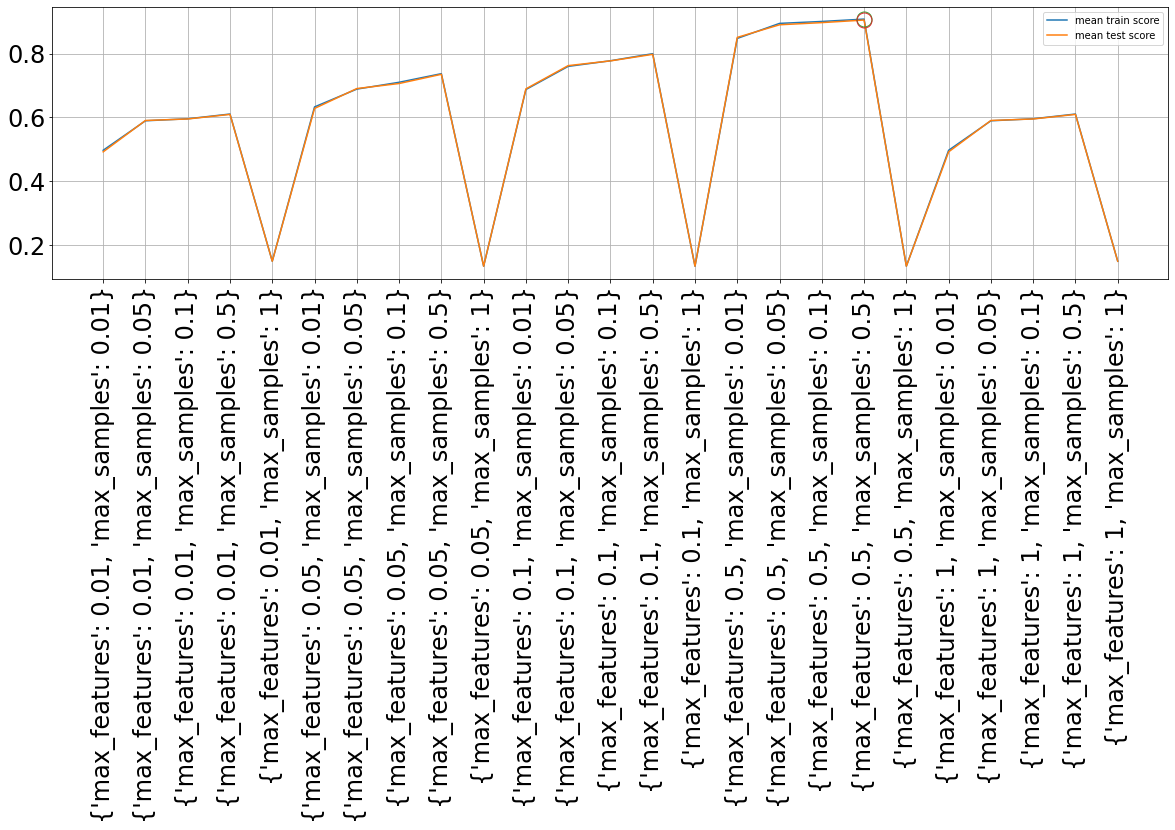

In [38]:
result = pd.DataFrame(paste_log_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([paste_log_grid.best_index_], result['mean_train_score'][paste_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([paste_log_grid.best_index_], result['mean_test_score'][paste_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [39]:
print("Best parameters for Logistic Regression with Pasting: {}".format(paste_log_grid.best_params_))
print("Best cross-validation score for Logistic Regression with Pasting: {:.4f}".format(cvpastelog))
print("Test score for Logistic Regression with Pasting: {:.4f}".format(testpastelog))

Best parameters for Logistic Regression with Pasting: {'max_features': 0.5, 'max_samples': 0.5}
Best cross-validation score for Logistic Regression with Pasting: 0.9050
Test score for Logistic Regression with Pasting: 0.8975


### Pasting: Decision Tree Classifier

In [40]:
param_grid = {'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}
              

paste_dtc = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0), bootstrap = False, random_state = 0)
paste_dtc_grid = GridSearchCV(paste_dtc, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
paste_dtc_grid.fit(X_train, y_train)

cvpastedtc = paste_dtc_grid.best_score_
testpastedtc = paste_dtc_grid.score(X_test, y_test)

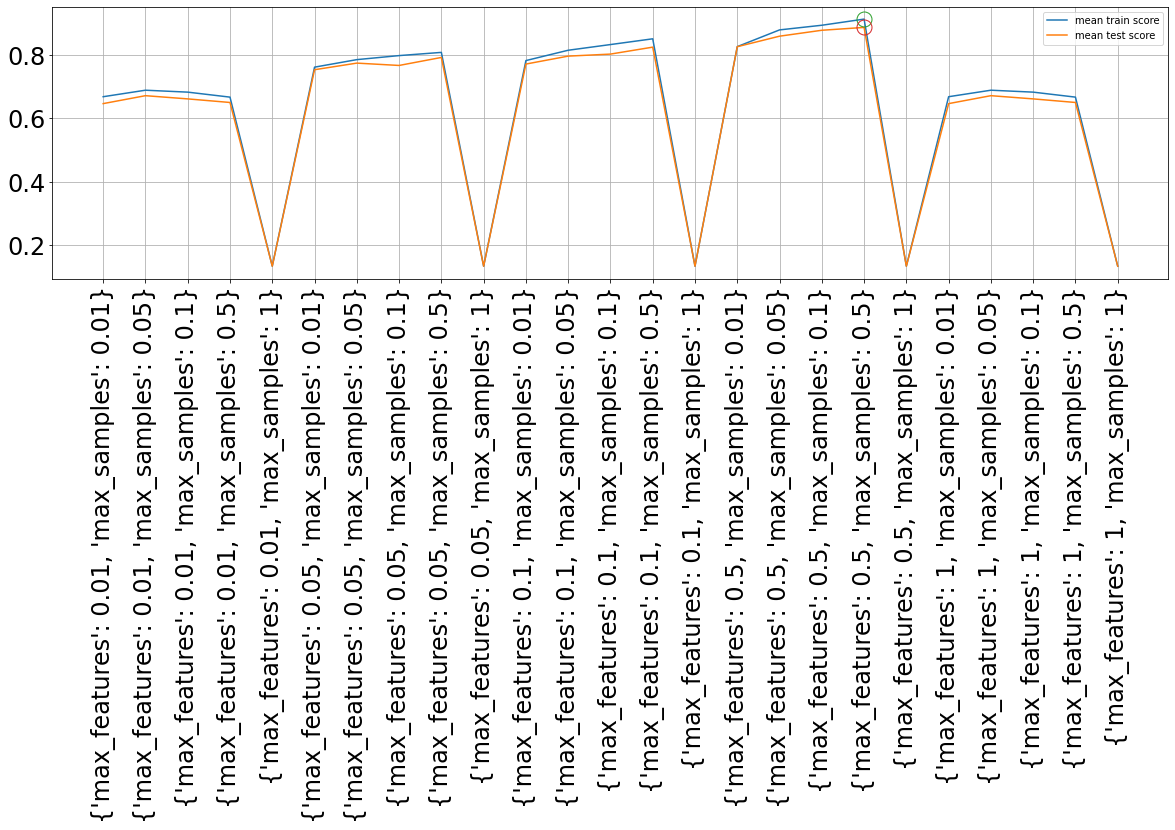

In [41]:
result = pd.DataFrame(paste_dtc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([paste_dtc_grid.best_index_], result['mean_train_score'][paste_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([paste_dtc_grid.best_index_], result['mean_test_score'][paste_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [42]:
print("Best parameters for Decision Tree Classifier with Pasting: {}".format(paste_dtc_grid.best_params_))
print("Best cross-validation score for Decision Tree Classifier with Pasting: {:.4f}".format(cvpastedtc))
print("Test score for Decision Tree Classifier with Pasting: {:.4f}".format(testpastedtc))

Best parameters for Decision Tree Classifier with Pasting: {'max_features': 0.5, 'max_samples': 0.5}
Best cross-validation score for Decision Tree Classifier with Pasting: 0.8861
Test score for Decision Tree Classifier with Pasting: 0.8870


### Ada Boost: Logistic Regression

In [43]:
from sklearn.ensemble import AdaBoostClassifier


param_grid = {'n_estimators': [100, 200, 500, 1000],
              'learning_rate':[0.001, 0.01, 0.1, 1]}

ada_log = AdaBoostClassifier(LogisticRegression(C = 10, max_iter = 1000, random_state = 0),random_state = 0)
ada_log_grid = GridSearchCV(ada_log, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
ada_log_grid.fit(X_train, y_train)

cvadalog = ada_log_grid.best_score_
testadalog = ada_log_grid.score(X_test, y_test)

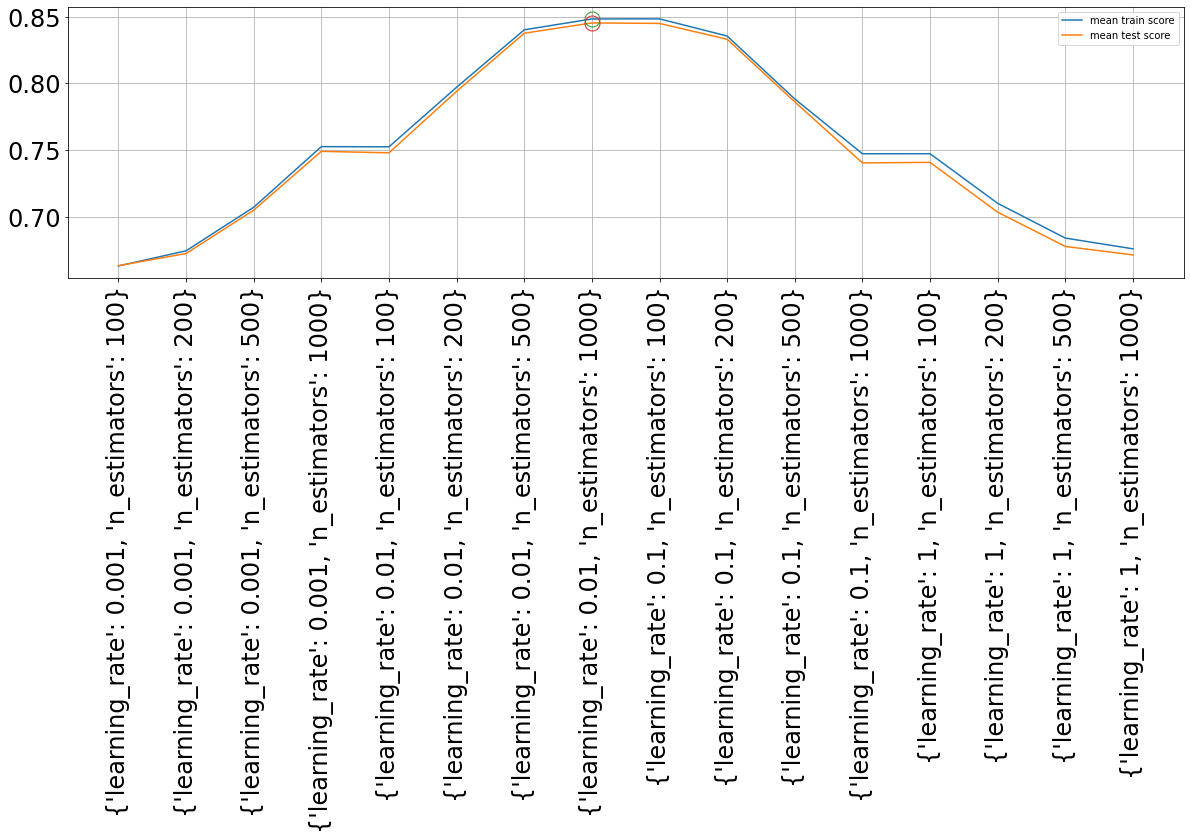

In [44]:
result = pd.DataFrame(ada_log_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([ada_log_grid.best_index_], result['mean_train_score'][ada_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([ada_log_grid.best_index_], result['mean_test_score'][ada_log_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [45]:
print("Best parameters for Logistic Regression with Ada Boost: {}".format(ada_log_grid.best_params_))
print("Best cross-validation score for Logistic Regression with Ada Boost: {:.4f}".format(cvadalog))
print("Test score for Logistic Regression with Ada Boost: {:.4f}".format(testadalog))

Best parameters for Logistic Regression with Ada Boost: {'learning_rate': 0.01, 'n_estimators': 1000}
Best cross-validation score for Logistic Regression with Ada Boost: 0.8452
Test score for Logistic Regression with Ada Boost: 0.8585


### Ada Boost: Decision Tree Classifier

In [46]:
param_grid = {'n_estimators': [100, 200, 500, 1000],
              'learning_rate':[0.001, 0.01, 0.1, 1]}

ada_dtc = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0),random_state = 0)
ada_dtc_grid = GridSearchCV(ada_dtc, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
ada_dtc_grid.fit(X_train, y_train)

cvadadtc = ada_dtc_grid.best_score_
testadadtc = ada_dtc_grid.score(X_test, y_test)

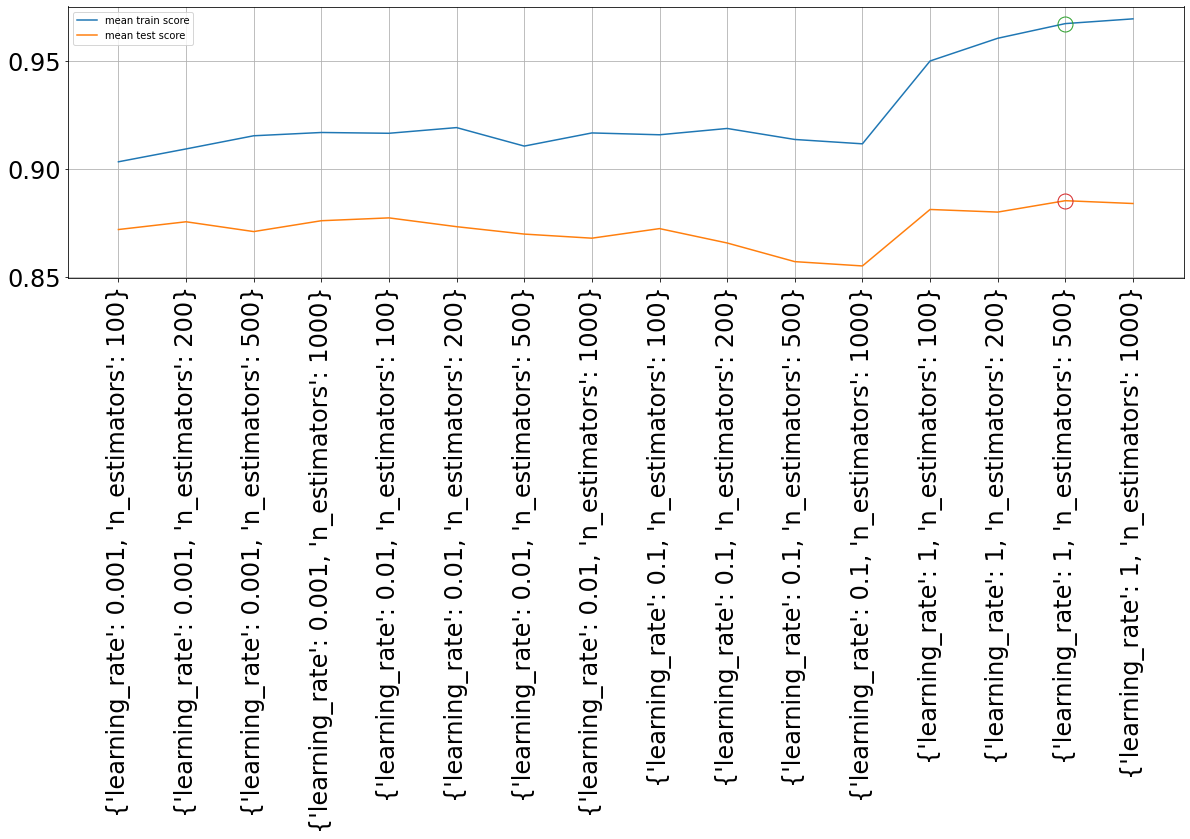

In [47]:
result = pd.DataFrame(ada_dtc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([ada_dtc_grid.best_index_], result['mean_train_score'][ada_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([ada_dtc_grid.best_index_], result['mean_test_score'][ada_dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [48]:
print("Best parameters for Decision Tree Classifier with Ada Boost: {}".format(ada_dtc_grid.best_params_))
print("Best cross-validation score for Decision Tree Classifier with Ada Boost: {:.4f}".format(cvadadtc))
print("Test score for Decision Tree Classifier with Ada Boost: {:.4f}".format(testadadtc))

Best parameters for Decision Tree Classifier with Ada Boost: {'learning_rate': 1, 'n_estimators': 500}
Best cross-validation score for Decision Tree Classifier with Ada Boost: 0.8854
Test score for Decision Tree Classifier with Ada Boost: 0.8814


### Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [200, 500, 1000],
              'learning_rate':[0.001, 0.01, 0.1],
              'max_depth':[1, 2, 5]}

gbc = GradientBoostingClassifier(random_state = 0)
gbc_grid = GridSearchCV(gbc, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
gbc_grid.fit(X_train, y_train)

cvgbc = gbc_grid.best_score_
testgbc = gbc_grid.score(X_test, y_test)

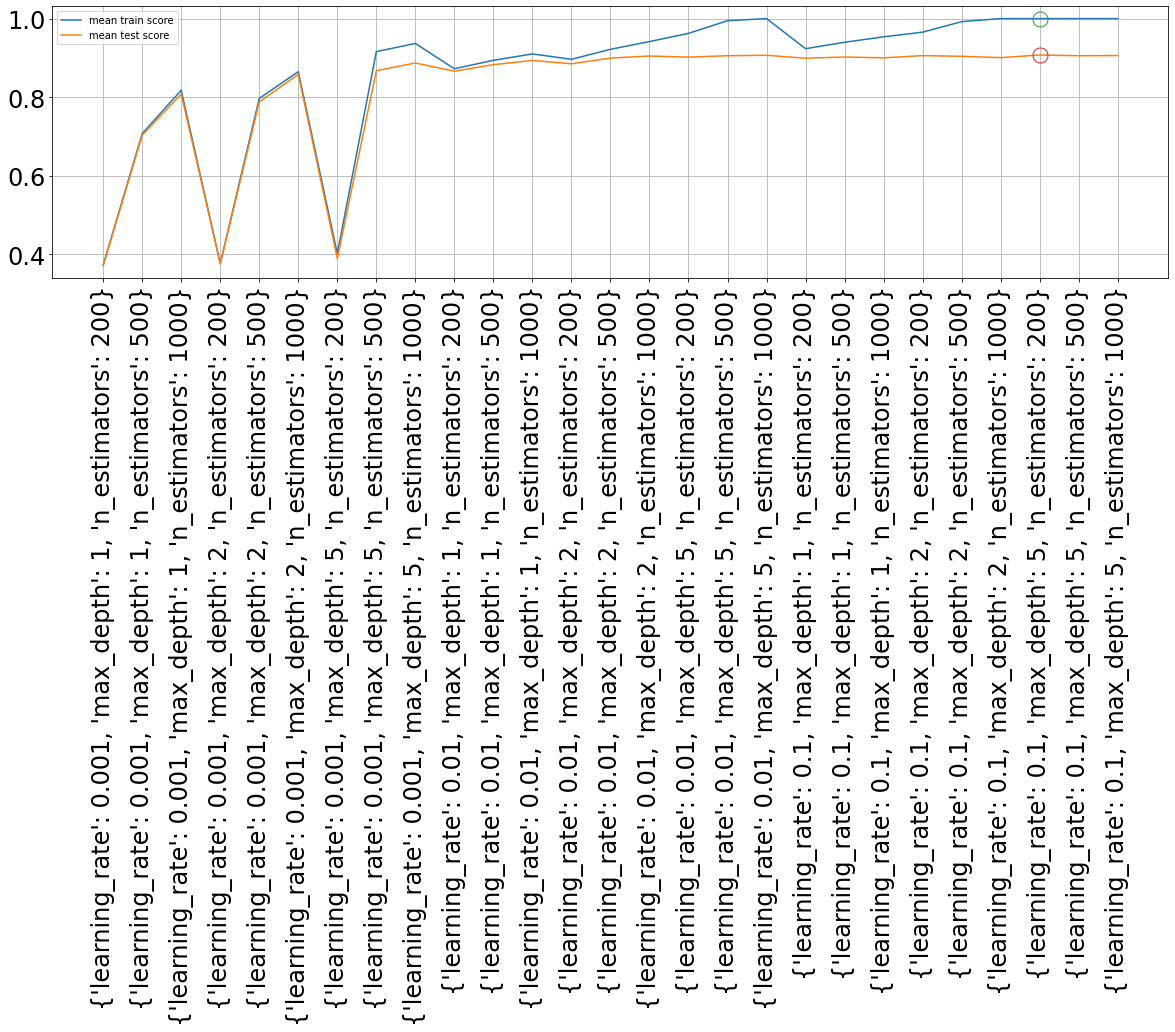

In [50]:
result = pd.DataFrame(gbc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([gbc_grid.best_index_], result['mean_train_score'][gbc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gbc_grid.best_index_], result['mean_test_score'][gbc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [51]:
print("Best parameters for Gradient Boosting Classifier: {}".format(gbc_grid.best_params_))
print("Best cross-validation score for Gradient Boosting Classifier: {:.4f}".format(cvgbc))
print("Test score for Gradient Boosting Classifier: {:.4f}".format(testgbc))

Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting Classifier: 0.9073
Test score for Gradient Boosting Classifier: 0.9061


### PCA Transformation

We will use PCA to reduce our feature size while retaining 95% of explained variance. Our dataset 42 features are reduced to 24. We will re-run all our classification models using the PCA dataset instead of the full dataset.

In [52]:
# Making copies of the splitted dataset

X_train_t = X_train
X_test_t = X_test

X_train_t1 = X_train
X_test_t1 = X_test

X_train_t2 = X_train
X_test_t2 = X_test

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train_pca = pca.fit_transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

# Shape of the PCA-transformed data
X_train_pca.shape

(3750, 24)

In [54]:
X_train = X_train_pca
X_test = X_test_pca

### KNN Classification

In [55]:
#### KNN Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors': range(1,20)}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, param_grid = param_knn, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
knn_grid.fit(X_train, y_train)

cvknn = knn_grid.best_score_
testknn = knn_grid.score(X_test, y_test)

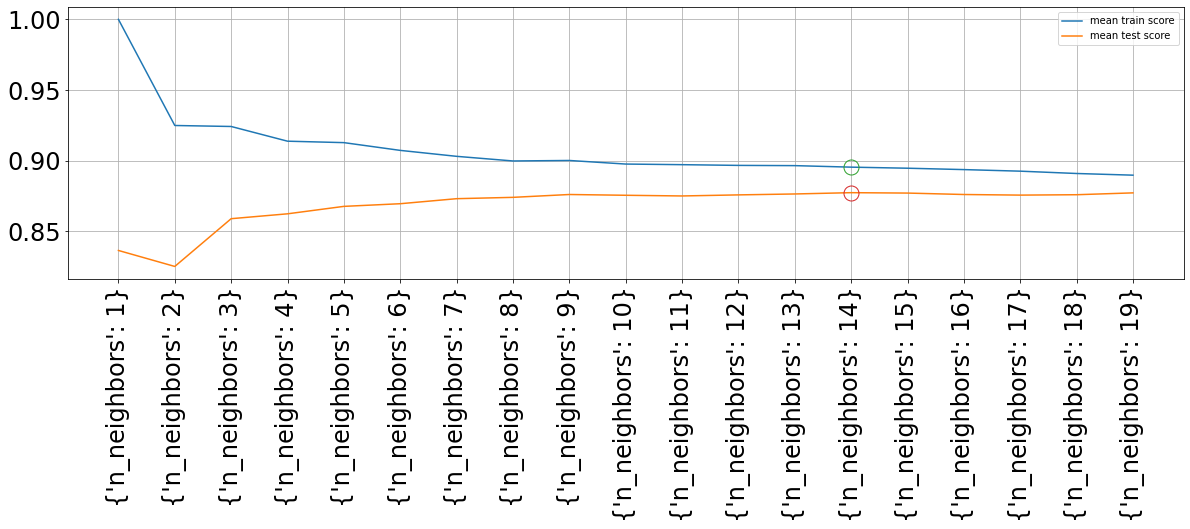

In [56]:
result = pd.DataFrame(knn_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([knn_grid.best_index_], result['mean_train_score'][knn_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid.best_index_], result['mean_test_score'][knn_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [57]:
print("Best parameters for KNN Classifier: {}".format(knn_grid.best_params_))
print("Best cross-validation score for KNN Classifier: {:.4f}".format(cvknn))
print("Test score for KNN Classifier: {:.4f}".format(testknn))

Best parameters for KNN Classifier: {'n_neighbors': 14}
Best cross-validation score for KNN Classifier: 0.8774
Test score for KNN Classifier: 0.8689


In [58]:
# Classification report for KNN Classifier

from sklearn.metrics import classification_report

y_pred = knn_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))


              precision    recall  f1-score   support

    attacker       0.88      0.71      0.79       212
  midfielder       0.79      0.88      0.83       509
    defender       0.90      0.85      0.88       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.85      1250
   macro avg       0.88      0.86      0.87      1250
weighted avg       0.86      0.85      0.85      1250



### Logistics Regression

In [59]:
from sklearn.linear_model import LogisticRegression

param_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'max_iter': [1000, 5000, 10000]}

logreg = LogisticRegression(random_state = 0)

logreg_grid = GridSearchCV(logreg, param_grid = param_logreg, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
logreg_grid.fit(X_train, y_train)

cvlogreg = logreg_grid.best_score_
testlogreg = logreg_grid.score(X_test, y_test)

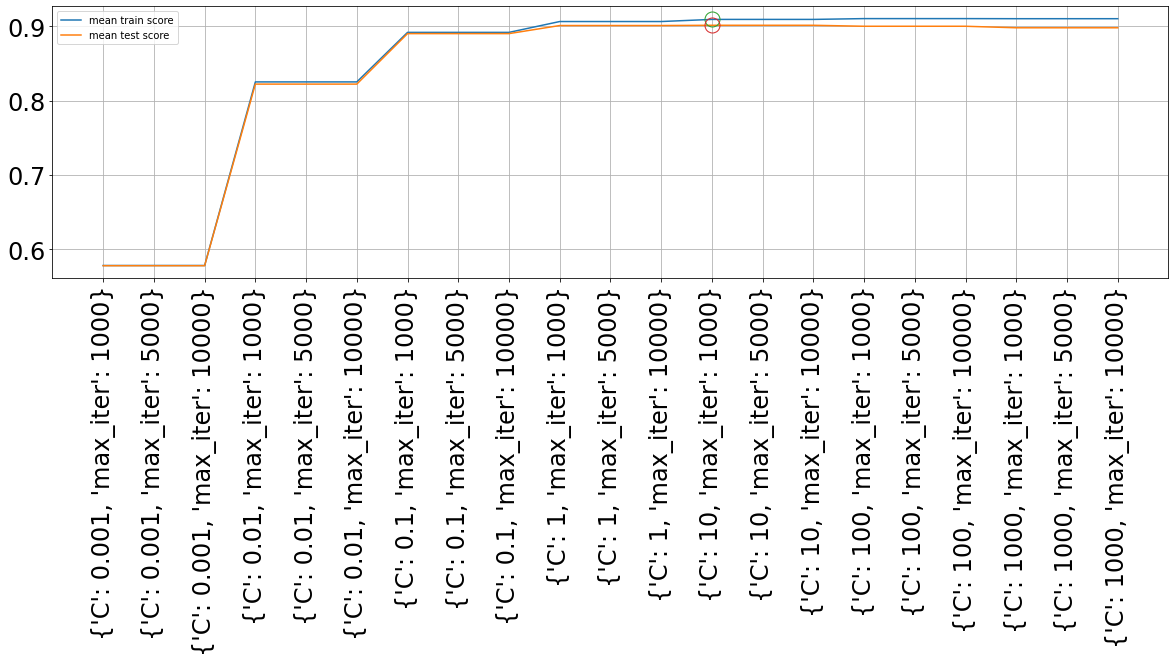

In [60]:
result = pd.DataFrame(logreg_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([logreg_grid.best_index_], result['mean_train_score'][logreg_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([logreg_grid.best_index_], result['mean_test_score'][logreg_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [61]:
print("Best parameters for Logistic Regression: {}".format(logreg_grid.best_params_))
print("Best cross-validation score for Logistic Regression: {:.4f}".format(cvlogreg))
print("Test score for Logistic Regression: {:.4f}".format(testlogreg))

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 1000}
Best cross-validation score for Logistic Regression: 0.9012
Test score for Logistic Regression: 0.8993


In [62]:
# Classification report for Logistic Regression Classifier

from sklearn.metrics import classification_report

y_pred = logreg_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.89      0.79      0.84       212
  midfielder       0.86      0.87      0.86       509
    defender       0.90      0.93      0.91       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.89      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.89      0.89      0.89      1250



### Linear SVC

We seee that we don't need to go above 100 for parameter C

In [63]:
from sklearn.svm import LinearSVC

param_lsvc = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [1000, 5000, 10000]}

lsvc = LinearSVC(random_state = 0)

lsvc_grid = GridSearchCV(lsvc, param_grid = param_lsvc, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
lsvc_grid.fit(X_train, y_train)

cvlsvc = lsvc_grid.best_score_
testlsvc = lsvc_grid.score(X_test, y_test)

D:\ANACONDA\envs\Jupyter\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


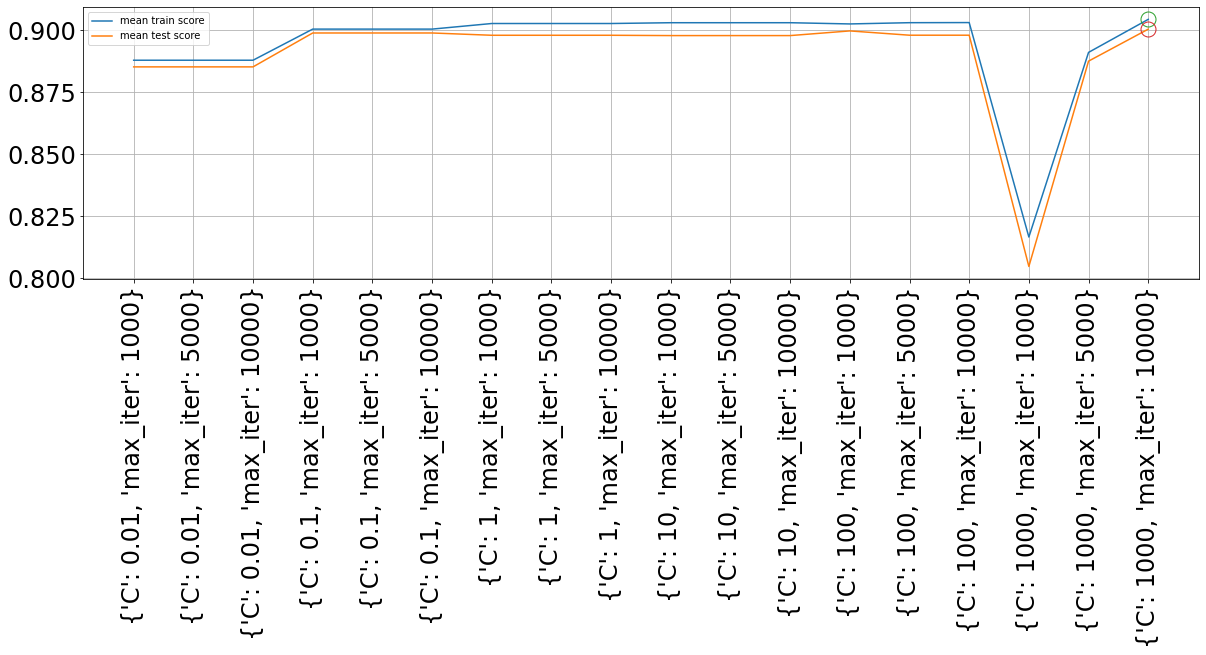

In [64]:
result = pd.DataFrame(lsvc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([lsvc_grid.best_index_], result['mean_train_score'][lsvc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lsvc_grid.best_index_], result['mean_test_score'][lsvc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [65]:
print("Best parameters for Linear SVC: {}".format(lsvc_grid.best_params_))
print("Best cross-validation score for Linear SVC: {:.4f}".format(cvlsvc))
print("Test score for Linear SVC: {:.4f}".format(testlsvc))

Best parameters for Linear SVC: {'C': 1000, 'max_iter': 10000}
Best cross-validation score for Linear SVC: 0.9004
Test score for Linear SVC: 0.8985


In [66]:
# Classification report for Linear SVC Classifier

from sklearn.metrics import classification_report

y_pred = lsvc_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.91      0.75      0.83       212
  midfielder       0.85      0.89      0.87       509
    defender       0.91      0.93      0.92       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.89      1250
   macro avg       0.91      0.89      0.90      1250
weighted avg       0.89      0.89      0.89      1250



### SVC (kernel = 'rbf')

In [67]:
from sklearn.svm import SVC

param_svcrbf = {'C': [0.01, 0.1, 1, 10, 100],
                'gamma': [0.01, 0.1, 1, 10, 100]}

svcrbf = SVC(kernel = 'rbf', random_state = 0)

svcrbf_grid = GridSearchCV(svcrbf, param_grid = param_svcrbf, cv = 5, scoring = 'f1_macro', 
                           n_jobs = -1, verbose = 10, return_train_score = True)
svcrbf_grid.fit(X_train, y_train)

cvsvcrbf = svcrbf_grid.best_score_
testsvcrbf = svcrbf_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


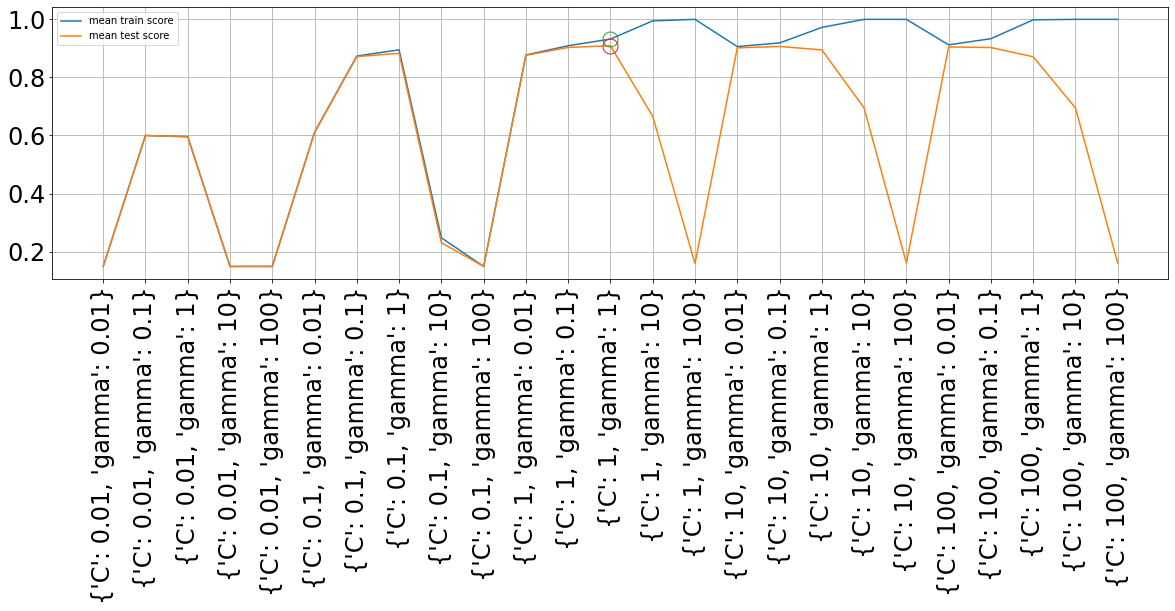

In [68]:
result = pd.DataFrame(svcrbf_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcrbf_grid.best_index_], result['mean_train_score'][svcrbf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcrbf_grid.best_index_], result['mean_test_score'][svcrbf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [69]:
print("Best parameters for SVC with rbf kernel: {}".format(svcrbf_grid.best_params_))
print("Best cross-validation score for SVC with rbf kernel: {:.4f}".format(cvsvcrbf))
print("Test score for SVC with rbf kernel: {:.4f}".format(testsvcrbf))

Best parameters for SVC with rbf kernel: {'C': 1, 'gamma': 1}
Best cross-validation score for SVC with rbf kernel: 0.9091
Test score for SVC with rbf kernel: 0.8945


In [70]:
# Classification report for SVC (rbf) Classifier

from sklearn.metrics import classification_report

y_pred = lsvc_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.91      0.75      0.83       212
  midfielder       0.85      0.89      0.87       509
    defender       0.91      0.93      0.92       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.89      1250
   macro avg       0.91      0.89      0.90      1250
weighted avg       0.89      0.89      0.89      1250



### SVC (kernel = 'poly')

In [71]:
param_svcpoly = {'C': [0.01, 0.1, 1, 10, 100],
                 'gamma': [0.01, 0.1, 1, 10, 100]}

svcpoly = SVC(kernel = 'poly', random_state = 0, max_iter = 10000)

svcpoly_grid = GridSearchCV(svcpoly, param_grid = param_svcpoly, cv = 5, scoring = 'f1_macro', 
                           n_jobs = -1, verbose = 10, return_train_score = True)
svcpoly_grid.fit(X_train, y_train)

cvsvcpoly = svcpoly_grid.best_score_
testsvcpoly = svcpoly_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


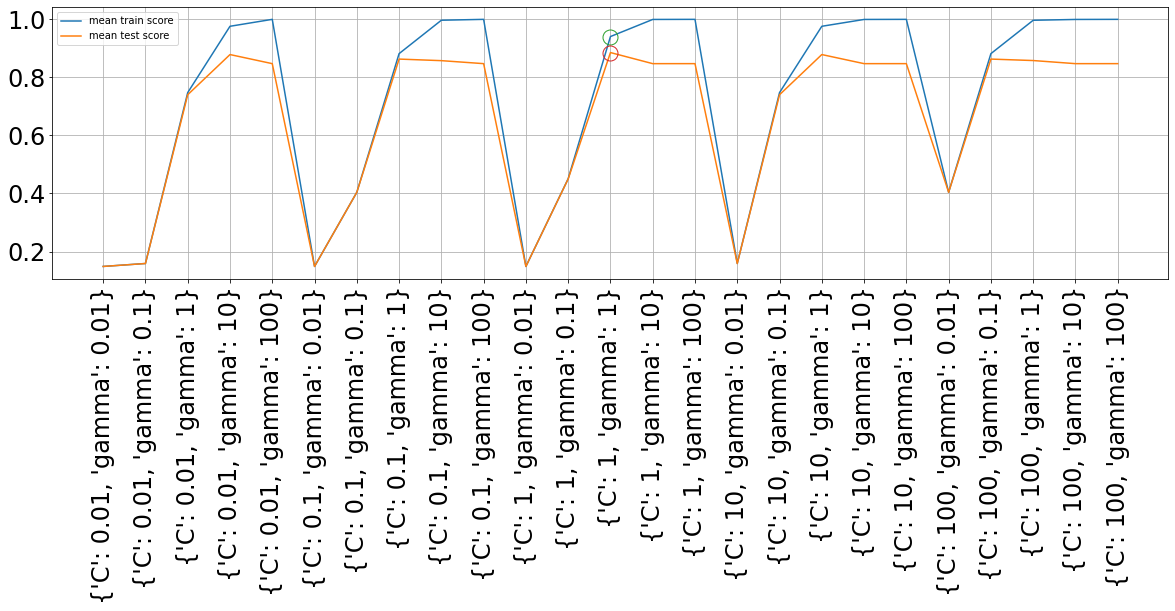

In [72]:
result = pd.DataFrame(svcpoly_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcpoly_grid.best_index_], result['mean_train_score'][svcpoly_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcpoly_grid.best_index_], result['mean_test_score'][svcpoly_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [73]:
print("Best parameters for SVC with poly kernel: {}".format(svcpoly_grid.best_params_))
print("Best cross-validation score for SVC with poly kernel: {:.4f}".format(cvsvcpoly))
print("Test score for SVC with poly kernel: {:.4f}".format(testsvcpoly))

Best parameters for SVC with poly kernel: {'C': 1, 'gamma': 1}
Best cross-validation score for SVC with poly kernel: 0.8855
Test score for SVC with poly kernel: 0.8802


In [74]:
# Classification report for SVC (poly) Classifier

from sklearn.metrics import classification_report

y_pred = svcpoly_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.90      0.73      0.80       212
  midfielder       0.82      0.89      0.85       509
    defender       0.91      0.91      0.91       404
  goalkeeper       0.96      0.95      0.96       125

    accuracy                           0.87      1250
   macro avg       0.90      0.87      0.88      1250
weighted avg       0.88      0.87      0.87      1250



### SVC(kernel = 'linear)

In [75]:
param_svcl = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

svcl = SVC(kernel = 'linear', random_state = 0)

svcl_grid = GridSearchCV(svcl, param_grid = param_svcl, cv = 5, scoring = 'f1_macro', 
                         n_jobs = -1, verbose = 10, return_train_score = True)
svcl_grid.fit(X_train, y_train)

cvsvcl = svcl_grid.best_score_
testsvcl = svcl_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


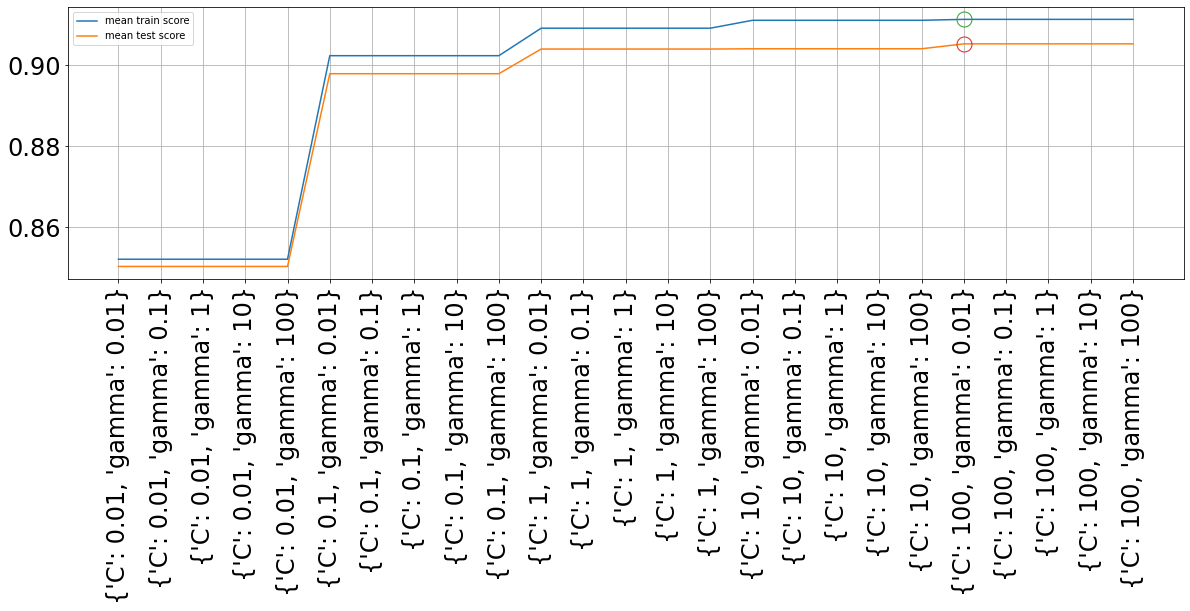

In [76]:
result = pd.DataFrame(svcl_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcl_grid.best_index_], result['mean_train_score'][svcl_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcl_grid.best_index_], result['mean_test_score'][svcl_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [77]:
print("Best parameters for SVC with linear kernel: {}".format(svcl_grid.best_params_))
print("Best cross-validation score for SVC with linear kernel: {:.4f}".format(cvsvcl))
print("Test score for SVC with linear kernel: {:.4f}".format(testsvcl))

Best parameters for SVC with linear kernel: {'C': 100, 'gamma': 0.01}
Best cross-validation score for SVC with linear kernel: 0.9052
Test score for SVC with linear kernel: 0.8970


In [78]:
# Classification report for SVC (linear) Classifier

from sklearn.metrics import classification_report

y_pred = svcl_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.90      0.77      0.83       212
  midfielder       0.85      0.87      0.86       509
    defender       0.90      0.93      0.92       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.89      1250
   macro avg       0.90      0.89      0.90      1250
weighted avg       0.89      0.89      0.89      1250



### Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

param_dtc = {'max_leaf_nodes': [2, 5, 10, 15, 20, 25, 50]}

dtc = DecisionTreeClassifier(random_state = 0)

dtc_grid = GridSearchCV(dtc, param_grid = param_dtc, cv = 5, scoring = 'f1_macro', 
                        n_jobs = -1, return_train_score = True)
dtc_grid.fit(X_train, y_train)

cvdtc = dtc_grid.best_score_
testdtc = dtc_grid.score(X_test, y_test)

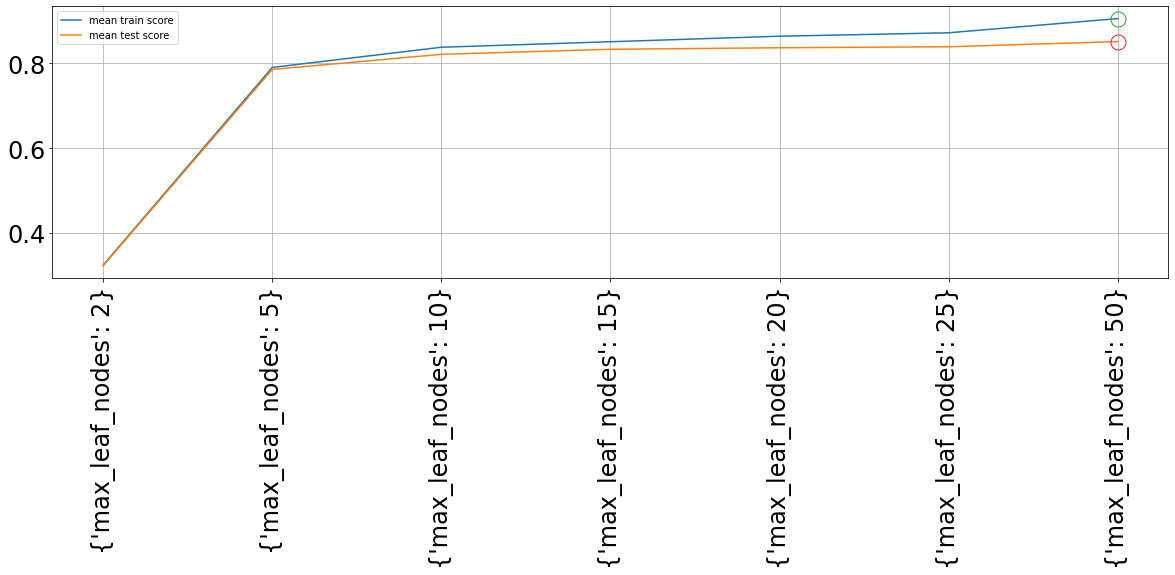

In [80]:
result = pd.DataFrame(dtc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([dtc_grid.best_index_], result['mean_train_score'][dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([dtc_grid.best_index_], result['mean_test_score'][dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [81]:
print("Best parameters for Decision Tree Classifier: {}".format(dtc_grid.best_params_))
print("Best cross-validation score for Decision Tree Classifier: {:.4f}".format(cvdtc))
print("Test score for Decision Tree Classifier: {:.4f}".format(testdtc))

Best parameters for Decision Tree Classifier: {'max_leaf_nodes': 50}
Best cross-validation score for Decision Tree Classifier: 0.8513
Test score for Decision Tree Classifier: 0.8358


In [82]:
# # Visualize the tree
# dtree = DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0)
# dtree.fit(X_train, y_train)

# import os 
# import graphviz
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

# # Create DOT data
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns) 

# # Draw graph
# graph = graphviz.Source(dot_data) 

# # Show graph
# graph 

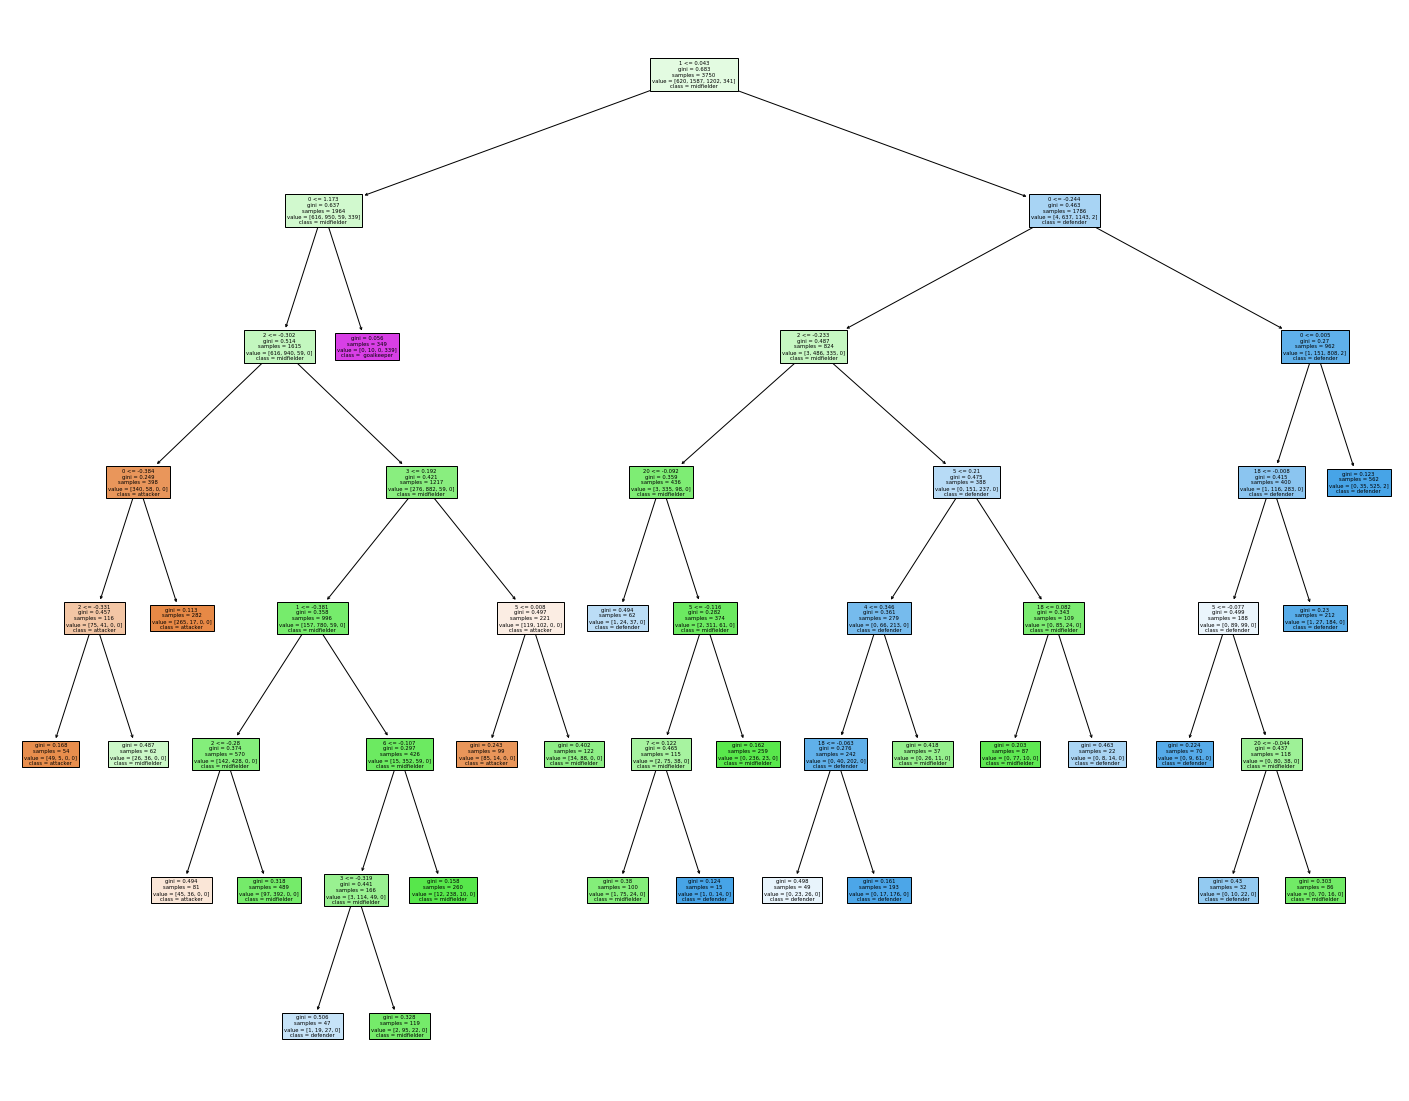

In [83]:
# Visualize the tree

from sklearn import tree
from matplotlib import pyplot as plt

dtree = DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0)
dtree.fit(X_train, y_train)

X_train_treeviz = pd.DataFrame(X_train)

fig_tree = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train_treeviz.columns,  
                   class_names= ['attacker', 'midfielder', 'defender', ' goalkeeper'],
                   filled=True)

## IV. Best model is with PCA

We have chosen the model SVC with Rbf kernel as the best model because it has the highest Cross-validated score as shown below.



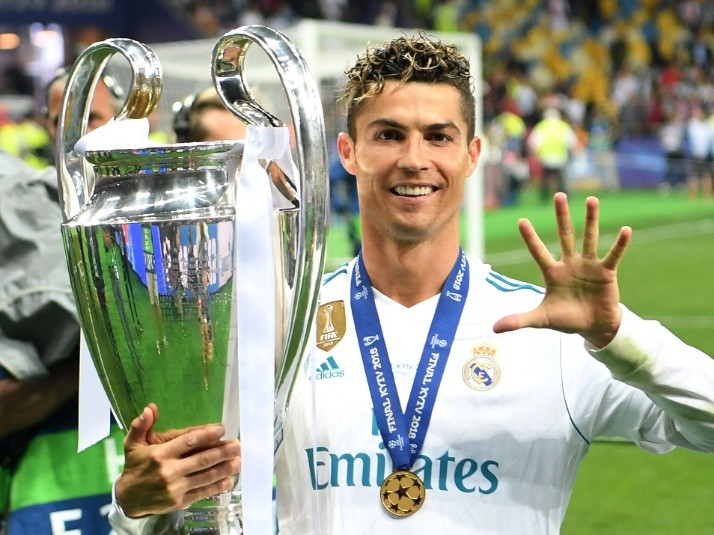

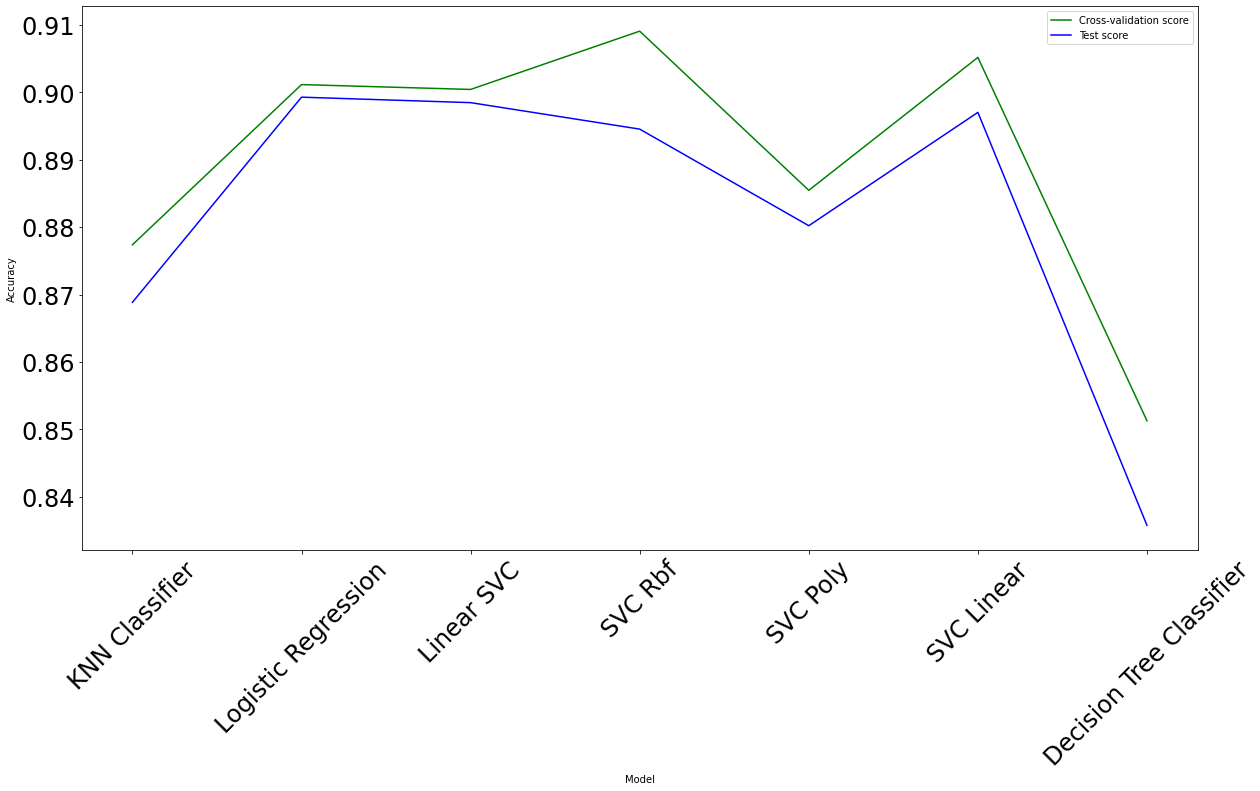

In [84]:
data = {'Model':['KNN Classifier', 'Logistic Regression', 'Linear SVC', 'SVC Rbf', 
                 'SVC Poly', 'SVC Linear', 'Decision Tree Classifier'],
        'Best Cross Validation Score':[cvknn, cvlogreg, cvlsvc, cvsvcrbf, cvsvcpoly, cvsvcl, cvdtc],
        'Test Score':[testknn, testlogreg, testlsvc, testsvcrbf, testsvcpoly, testsvcl, testdtc]}

df3 = pd.DataFrame(data)

plt.subplots(figsize = (20,10))
plt.plot(df3['Model'], df3['Best Cross Validation Score'], c='g', label = 'Cross-validation score')
plt.plot(df3['Model'], df3['Test Score'], c='b', label = 'Test score')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.legend();

In [85]:
print("Best parameters for SVC with rbf kernel: {}".format(svcrbf_grid.best_params_))
print("Best cross-validation score for SVC with rbf kernel: {:.4f}".format(cvsvcrbf))
print("Test score for SVC with rbf kernel: {:.4f}".format(testsvcrbf))

Best parameters for SVC with rbf kernel: {'C': 1, 'gamma': 1}
Best cross-validation score for SVC with rbf kernel: 0.9091
Test score for SVC with rbf kernel: 0.8945


In [86]:
best_model = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
best_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [87]:
# Classification report for best model -SVC (rbf) Classifier

from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.93      0.76      0.83       212
  midfielder       0.85      0.89      0.87       509
    defender       0.91      0.93      0.92       404
  goalkeeper       0.96      1.00      0.98       125

    accuracy                           0.89      1250
   macro avg       0.91      0.89      0.90      1250
weighted avg       0.89      0.89      0.89      1250



## V. Make comparision table between project 1 & 2

We see that the results from Full data set and the PCA-transformed performed relatively similar.

In [88]:
data3 = {'Model':['KNN Classifier', 'Logistic Regression', 'Linear SVC', 'SVC Rbf', 
                 'SVC Poly', 'SVC Linear', 'Decision Tree Classifier'],
         'Train(Full)':[0.8707, 0.8986, 0.8966, 0.9068, 0.9085, 0.9027, 0.8661],
         'Train(PCA)':[cvknn, cvlogreg, cvlsvc, cvsvcrbf, cvsvcpoly, cvsvcl, cvdtc],
         'Test(Full)':[0.8703, 0.9018, 0.9005, 0.9064, 0.9068, 0.9106, 0.8591],
         'Test (PCA)':[testknn, testlogreg, testlsvc, testsvcrbf, testsvcpoly, testsvcl, testdtc]}

df5 = pd.DataFrame(data3)
df5

,Model,Train(Full),Train(PCA),Test(Full),Test (PCA)
0,KNN Classifier,0.8707,0.877391,0.8703,0.868855
1,Logistic Regression,0.8986,0.901151,0.9018,0.899284
2,Linear SVC,0.8966,0.900431,0.9005,0.898472
3,SVC Rbf,0.9068,0.909075,0.9064,0.894545
4,SVC Poly,0.9085,0.885467,0.9068,0.880217
5,SVC Linear,0.9027,0.905178,0.9106,0.897029
6,Decision Tree Classifier,0.8661,0.851282,0.8591,0.835771


### Deep Learning MLP

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras 
from keras.wrappers.scikit_learn import KerasClassifier
#from numpy.random import seed
#seed(1)
#import tensorflow
#tensorflow.random.set_seed(1)

def create_model():
    model = Sequential()
    model.add(Dense(17, input_dim = 42, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

seed = 10
np.random.seed(seed)

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search2 = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
grid_search2.fit(X_train_t1, y_train)

cvdlc = grid_search2.best_score_
testdlc = grid_search2.score(X_test_t2, y_test)

C:\TEMP/ipykernel_25868/2278329437.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model, verbose = 0)


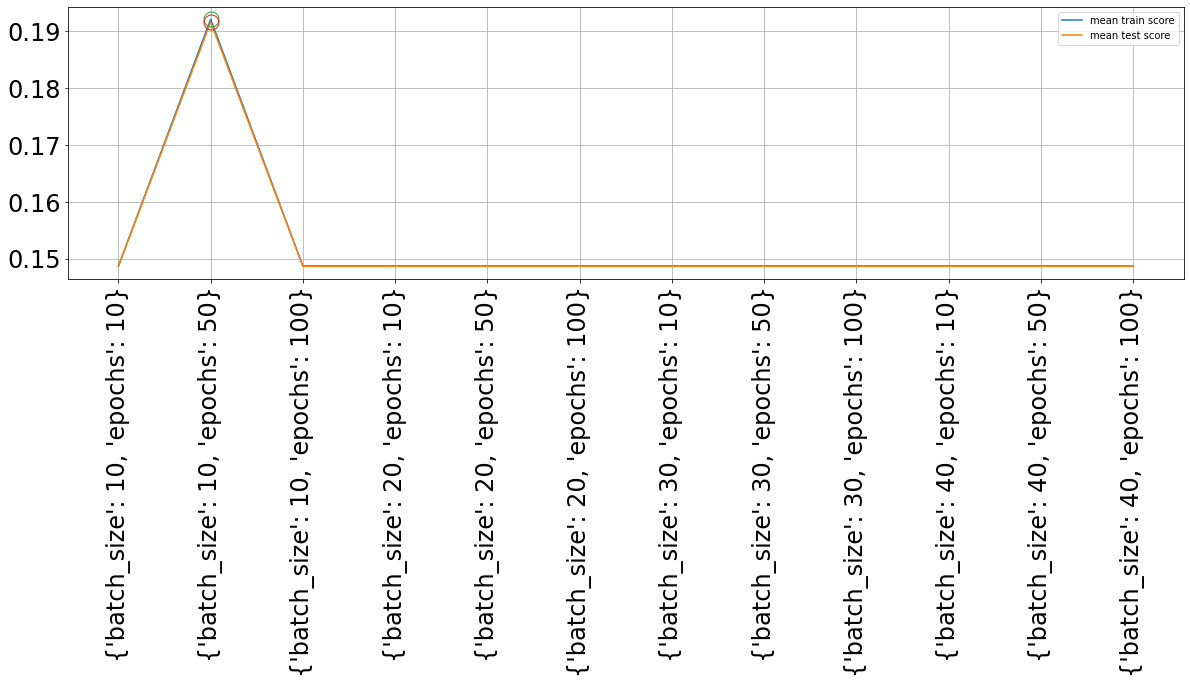

In [90]:
result = pd.DataFrame(grid_search2.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_search2.best_index_], result['mean_train_score'][grid_search2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_search2.best_index_], result['mean_test_score'][grid_search2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [91]:
print("Best parameters for MLP Classifier: {}".format(grid_search2.best_params_))
print("Best cross-validation score for Classifier: {:.4f}".format(cvdlc))
print("Test score for MLP Classifier: {:.4f}".format(testdlc))

Best parameters for MLP Classifier: {'batch_size': 10, 'epochs': 50}
Best cross-validation score for Classifier: 0.1916
Test score for MLP Classifier: 0.1447


## VI. Best Model Overall - Gradient Boosting

We found that the best performing model is Gradient Boosting. 

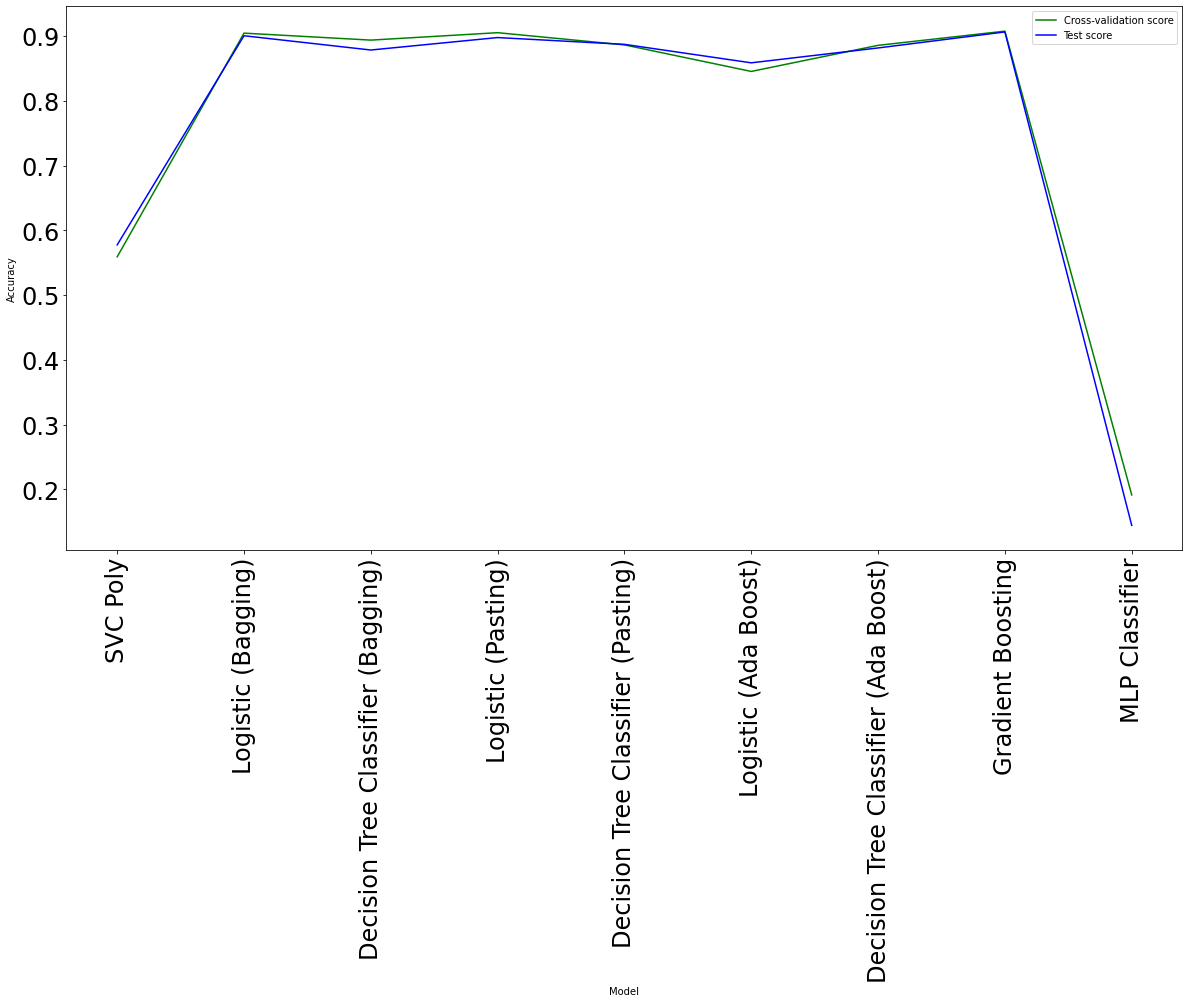

In [92]:
data4 = {'Model':['SVC Poly', 'Logistic (Bagging)', 'Decision Tree Classifier (Bagging)', 'Logistic (Pasting)', 
                  'Decision Tree Classifier (Pasting)', 'Logistic (Ada Boost)', 'Decision Tree Classifier (Ada Boost)',
                  'Gradient Boosting', 'MLP Classifier'],
        'Best Cross Validation Score':[0.5591, cvbaglog, cvbagdtc, cvpastelog, cvpastedtc, cvadalog, cvadadtc, cvgbc, cvdlc],
        'Test Score':[0.5775, testbaglog, testbagdtc, testpastelog, testpastedtc, testadalog, testadadtc, testgbc, testdlc]}

df6 = pd.DataFrame(data4)

plt.subplots(figsize = (20,10))
plt.plot(df6['Model'], df6['Best Cross Validation Score'], c='g', label = 'Cross-validation score')
plt.plot(df6['Model'], df6['Test Score'], c='b', label = 'Test score')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
plt.legend();